In [79]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from datetime import date, timedelta, time 


# Set Korean font for matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # To display minus sign correctly

df = pd.read_csv('./results/2nd-dataset_20230101~20241231_Ï†ÑÍµ≠_Ï†ÑÏ¢ÖÎ™©_Ï†ÑÏ≤¥ÏöîÏùº_20250605_113550.csv')

# Î∂ÑÏÑùÏö© Ìé∏Ïùò Ìï®Ïàò
def pct(n): return f"{n:.1%}"

In [80]:
df.head(10)

date   region  accident_count  injury_count  death_count  game_count  \
0  2023-01-01   Í∞ïÏõê Í∞ïÎ¶âÏãú               5            10            0           0   
1  2023-01-01   Í∞ïÏõê ÏõêÏ£ºÏãú               3             6            0           0   
2  2023-01-01   Í∞ïÏõê Ï∂òÏ≤úÏãú               0             0            0           0   
3  2023-01-01   Í≤ΩÍ∏∞ Í≥†ÏñëÏãú               0             0            0           1   
4  2023-01-01   Í≤ΩÍ∏∞ ÍπÄÌè¨Ïãú               0             0            0           0   
5  2023-01-01   Í≤ΩÍ∏∞ ÏàòÏõêÏãú              15            20            0           0   
6  2023-01-01   Í≤ΩÍ∏∞ ÏïàÏÇ∞Ïãú              11            13            0           1   
7  2023-01-01   Í≤ΩÍ∏∞ ÏïàÏñëÏãú               0             0            0           0   
8  2023-01-01  Í≤ΩÍ∏∞ ÏùòÏ†ïÎ∂ÄÏãú               1             1            0           0   
9  2023-01-01   Í≤ΩÍ∏∞ Ïù¥Ï≤úÏãú               1             1            0           0   

  sports_type  temperature  precipitation  snow_depth weather_condition  \
0          ÏóÜÏùå          4.9            0.0         0.0                ÎßëÏùå   
1          ÏóÜÏùå          0.0            0.0         0.0                ÎßëÏùå   
2          ÏóÜÏùå         -2.1            0.0         0.0                ÎßëÏùå   
3          ÎÜçÍµ¨         -0.6            0.0         0.0              Ï†ïÎ≥¥ÏóÜÏùå   
4          ÏóÜÏùå         -0.2            0.0         0.0              Ï†ïÎ≥¥ÏóÜÏùå   
5          ÏóÜÏùå         -2.0            0.0         0.0                ÎßëÏùå   
6          Î∞∞Íµ¨         -2.9            0.0         0.0              Ï†ïÎ≥¥ÏóÜÏùå   
7          ÏóÜÏùå          1.1            0.0         0.0              Ï†ïÎ≥¥ÏóÜÏùå   
8          ÏóÜÏùå         -1.5            0.0         0.0              Ï†ïÎ≥¥ÏóÜÏùå   
9          ÏóÜÏùå         -1.9            0.0         0.0                ÎßëÏùå   

   is_post_season  is_hometeam_win  is_holiday weekday  audience  \
0               0                0           1       Ïùº         0   
1               0                0           1       Ïùº         0   
2               0                0           1       Ïùº         0   
3               0                0           1       Ïùº         0   
4               0                0           1       Ïùº         0   
5               0                0           1       Ïùº         0   
6               0                1           1       Ïùº      1906   
7               0                0           1       Ïùº         0   
8               0                0           1       Ïùº         0   
9               0                0           1       Ïùº         0   

   game_start_time    game_end_time  
0              NaN              NaN  
1              NaN              NaN  
2              NaN              NaN  
3  0 days 14:00:00  0 days 15:20:00  
4              NaN              NaN  
5              NaN              NaN  
6  0 days 14:00:00  0 days 16:00:00  
7              NaN              NaN  
8              NaN              NaN  
9              NaN              NaN

In [81]:
df.columns

Index(['date', 'region', 'accident_count', 'injury_count', 'death_count',
       'game_count', 'sports_type', 'temperature', 'precipitation',
       'snow_depth', 'weather_condition', 'is_post_season', 'is_hometeam_win',
       'is_holiday', 'weekday', 'audience', 'game_start_time',
       'game_end_time'],
      dtype='object')

                      Í±¥Ïàò     ÎπÑÏú®
game_end_time      25202  88.4%
game_start_time    25202  88.4%
temperature          934   3.3%
precipitation        928   3.3%
snow_depth           928   3.3%
weather_condition    197   0.7%
game_count             0   0.0%
sports_type            0   0.0%
death_count            0   0.0%
injury_count           0   0.0%
region                 0   0.0%
is_post_season         0   0.0%
is_hometeam_win        0   0.0%
is_holiday             0   0.0%
weekday                0   0.0%
audience               0   0.0%
accident_count         0   0.0%
date                   0   0.0%


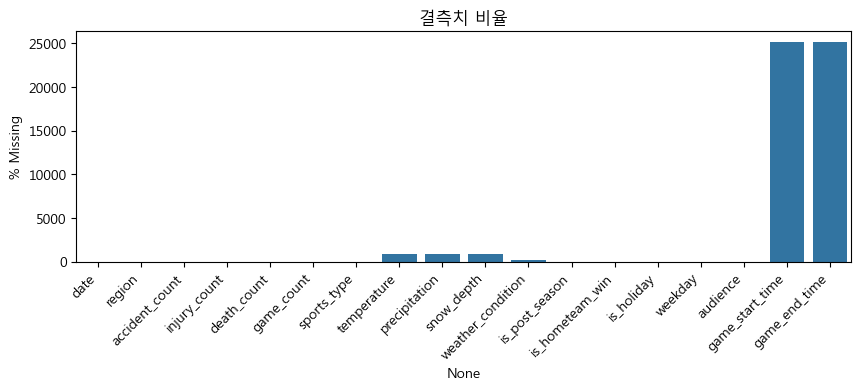

In [82]:
# Í≤∞Ï∏°Ïπò Ï≤¥ÌÅ¨
na_cnt = df.isna().sum()
na_rate = (na_cnt/len(df)).map(pct)
na_report = pd.concat([na_cnt, na_rate], axis=1, keys=["Í±¥Ïàò", "ÎπÑÏú®"])
print(na_report.sort_values("ÎπÑÏú®", ascending=False))

# Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî ---------------
plt.figure(figsize=(10,3))
sns.barplot(x=na_cnt.index, y=na_cnt.values)
plt.xticks(rotation=45, ha="right"); plt.ylabel("% Missing")
plt.title("Í≤∞Ï∏°Ïπò ÎπÑÏú®"); plt.show()

In [83]:
## Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨. 
## Îã§Ïùå Í∞íÎì§ÏùÄ Î™®Îëê 0 ÏúºÎ°ú Ï±ÑÏõÄ
## precipitatione, death_count, injury_count, accident_count, snow_depth     

# Í≤∞Ï∏°ÏπòÎ•º 0ÏúºÎ°ú Ï±ÑÏö∏ ÎåÄÏÉÅ Ïª¨Îüº Î™©Î°ù
cols_to_fill = ["precipitation", "snow_depth", "temperature"]

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌï¥ NaN ‚Üí 0 ÎåÄÏ≤¥
df.loc[:, df.columns.intersection(cols_to_fill)] = (
    df.loc[:, df.columns.intersection(cols_to_fill)].fillna(0)
)

# ÌôïÏù∏
print(df[cols_to_fill].isna().sum())

precipitation    0
snow_depth       0
temperature      0
dtype: int64


In [84]:
# audience Ïóê ÎåÄÌïú Í≤∞Ï∏°ÏπòÎäî Í∞Å ÏßÄÏó≠ Í¥ÄÏ§ëÏàòÏùò ÌèâÍ∑†Ïóê Ìé¥Ï∞®Î•º ÎëêÏñ¥ Í≥ÑÏÇ∞
# regionÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞

print(f"Í¥ÄÏ§ëÏàòÍ∞Ä 0Ïù∏ Ìñâ Í∞ØÏàò:{(df['audience'] == 0).sum()}")
print(f"Ïä§Ìè¨Ï∏† Ï¢ÖÎ™©Ïù¥ ÏóÜÏùå Í∞ØÏàò:{(df['sports_type'] == 'ÏóÜÏùå').sum()}")

region_mean = df.groupby('region')['audience'].mean()
print(region_mean)

def impute_with_noise(row):
    if row['sports_type'] != 'ÏóÜÏùå' and row['audience'] == 0:
        mean_val = region_mean.get(row['region'], np.nan)
        if pd.notna(mean_val):
            noise = np.random.normal(loc=0, scale=0.1)  # ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 0.1 ‚Üí ¬±10% Ï†ïÎèÑ Ïò§Ï∞®
            return (mean_val * (1 + noise)).astype(int)
    return row['audience']

# 4. Ï†ÅÏö©
df['audience'] = df.apply(impute_with_noise, axis=1)

Í¥ÄÏ§ëÏàòÍ∞Ä 0Ïù∏ Ìñâ Í∞ØÏàò:26261
Ïä§Ìè¨Ï∏† Ï¢ÖÎ™©Ïù¥ ÏóÜÏùå Í∞ØÏàò:25202
region
Í∞ïÏõê Í∞ïÎ¶âÏãú      275.989056
Í∞ïÏõê ÏõêÏ£ºÏãú        0.000000
Í∞ïÏõê Ï∂òÏ≤úÏãú      129.894665
Í≤ΩÍ∏∞ Í≥†ÏñëÏãú        0.000000
Í≤ΩÍ∏∞ ÍπÄÌè¨Ïãú        0.000000
Í≤ΩÍ∏∞ ÏàòÏõêÏãú     3081.552668
Í≤ΩÍ∏∞ ÏïàÏÇ∞Ïãú       91.166895
Í≤ΩÍ∏∞ ÏïàÏñëÏãú        0.000000
Í≤ΩÍ∏∞ ÏùòÏ†ïÎ∂ÄÏãú      71.076607
Í≤ΩÍ∏∞ Ïù¥Ï≤úÏãú        0.000000
Í≤ΩÍ∏∞ ÌôîÏÑ±Ïãú      203.534884
Í≤ΩÎÇ® Ï∞ΩÏõêÏãú     2030.247606
Í≤ΩÎ∂Å Íµ¨ÎØ∏Ïãú        0.000000
Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú      215.436389
Í≤ΩÎ∂Å Ìè¨Ìï≠Ïãú      562.377565
Í¥ëÏ£º Í¥ëÏÇ∞Íµ¨      252.166895
Í¥ëÏ£º Î∂ÅÍµ¨      2827.045144
ÎåÄÍµ¨ ÎèôÍµ¨       577.731874
ÎåÄÍµ¨ ÏàòÏÑ±Íµ¨     3281.521204
ÎåÄÏ†Ñ Ïú†ÏÑ±Íµ¨      590.250342
ÎåÄÏ†Ñ Ï§ëÍµ¨       291.132695
Î∂ÄÏÇ∞ ÎèôÎûòÍµ¨     3182.582763
Î∂ÄÏÇ∞ Ïó∞Ï†úÍµ¨        0.000000
ÏÑúÏö∏ Íµ¨Î°úÍµ¨     2067.519836
ÏÑúÏö∏ ÎßàÌè¨Íµ¨     1273.761970
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨     7698.253078
ÏÑúÏö∏ ÏñëÏ≤úÍµ¨        0.000000
ÏÑúÏö∏ Ï§ëÍµ¨       290.322845


In [85]:
df['audience'] = df['audience'].astype(int)
df

date  region  accident_count  injury_count  death_count  \
0      2023-01-01  Í∞ïÏõê Í∞ïÎ¶âÏãú               5            10            0   
1      2023-01-01  Í∞ïÏõê ÏõêÏ£ºÏãú               3             6            0   
2      2023-01-01  Í∞ïÏõê Ï∂òÏ≤úÏãú               0             0            0   
3      2023-01-01  Í≤ΩÍ∏∞ Í≥†ÏñëÏãú               0             0            0   
4      2023-01-01  Í≤ΩÍ∏∞ ÍπÄÌè¨Ïãú               0             0            0   
...           ...     ...             ...           ...          ...   
28504  2024-12-31  Ï†ÑÎ∂Å Íµ∞ÏÇ∞Ïãú               3             9            0   
28505  2024-12-31  Ï†ÑÎ∂Å Ï†ÑÏ£ºÏãú               7             9            0   
28506  2024-12-31  Ï†úÏ£º Ï†úÏ£ºÏãú              12            16            0   
28507  2024-12-31  Ï∂©ÎÇ® Ï≤úÏïàÏãú               7            10            0   
28508  2024-12-31  Ï∂©Î∂Å Ï≤≠Ï£ºÏãú              19            29            2   

       game_count sports_type  temperature  precipitation  snow_depth  \
0               0          ÏóÜÏùå          4.9            0.0         0.0   
1               0          ÏóÜÏùå          0.0            0.0         0.0   
2               0          ÏóÜÏùå         -2.1            0.0         0.0   
3               1          ÎÜçÍµ¨         -0.6            0.0         0.0   
4               0          ÏóÜÏùå         -0.2            0.0         0.0   
...           ...         ...          ...            ...         ...   
28504           0          ÏóÜÏùå          3.1            0.0         0.0   
28505           0          ÏóÜÏùå          3.5            0.1         0.1   
28506           0          ÏóÜÏùå          8.6            0.0         0.0   
28507           0          ÏóÜÏùå          1.7            0.0         0.0   
28508           0          ÏóÜÏùå          2.7            0.0         0.0   

      weather_condition  is_post_season  is_hometeam_win  is_holiday weekday  \
0                    ÎßëÏùå               0                0           1       Ïùº   
1                    ÎßëÏùå               0                0           1       Ïùº   
2                    ÎßëÏùå               0                0           1       Ïùº   
3                  Ï†ïÎ≥¥ÏóÜÏùå               0                0           1       Ïùº   
4                  Ï†ïÎ≥¥ÏóÜÏùå               0                0           1       Ïùº   
...                 ...             ...              ...         ...     ...   
28504                ÎßëÏùå               0                0           0       Ìôî   
28505                 ÎπÑ               0                0           0       Ìôî   
28506              ÏïΩÍ∞ÑÌùêÎ¶º               0                0           0       Ìôî   
28507                ÎßëÏùå               0                0           0       Ìôî   
28508                ÎßëÏùå               0                0           0       Ìôî   

       audience  game_start_time    game_end_time  
0             0              NaN              NaN  
1             0              NaN              NaN  
2             0              NaN              NaN  
3             0  0 days 14:00:00  0 days 15:20:00  
4             0              NaN              NaN  
...         ...              ...              ...  
28504         0              NaN              NaN  
28505         0              NaN              NaN  
28506         0              NaN              NaN  
28507         0              NaN              NaN  
28508         0              NaN              NaN  

[28509 rows x 18 columns]

In [86]:
print(f"Í¥ÄÏ§ëÏàòÍ∞Ä 0Ïù∏ Ìñâ Í∞ØÏàò:{(df['audience'] == 0).sum()}")
print(f"Ïä§Ìè¨Ï∏† Ï¢ÖÎ™©Ïù¥ ÏóÜÏùå Í∞ØÏàò:{(df['sports_type'] == 'ÏóÜÏùå').sum()}")

Í¥ÄÏ§ëÏàòÍ∞Ä 0Ïù∏ Ìñâ Í∞ØÏàò:25455
Ïä§Ìè¨Ï∏† Ï¢ÖÎ™©Ïù¥ ÏóÜÏùå Í∞ØÏàò:25202


In [91]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# Î™®Îì† Ïä§Ìè¨Ï∏† Î∂àÎ¶∞ Ïª¨Îüº ÏÉùÏÑ±
all_sports = set()
for sports_list in df['sports_type'].unique():
    if sports_list != "ÏóÜÏùå":
        for sport in sports_list.split(','):
            all_sports.add(sport.strip()) # .strip() to remove potential leading/trailing spaces

print("\nIdentified unique sport types:", sorted(list(all_sports)))

# Create boolean columns for each identified sport
for sport in sorted(list(all_sports)):
    df[f'is_{sport}'] = df['sports_type'].apply(lambda x: sport in x)

# Î™®Îì† ÏöîÏùº Î∂àÎ¶∞ Ïª¨Îüº ÏÉùÏÑ±
all_weekday = set()
for day_list in df['weekday'].unique():
    for day in day_list:
        all_weekday.add(day.strip()) # .strip() to remove potential leading/trailing spaces

print("\nIdentified unique day:", sorted(list(all_weekday)))

# Create boolean columns for each identified day
for day in sorted(list(all_weekday)):
    df[f'is_{day}'] = df['weekday'].apply(lambda x: day in x)
    
# Î™®Îì† ÎÇ†Ïî® ÎçîÎØ∏ Ïª¨Îüº ÏÉùÏÑ±
df = pd.get_dummies(df, columns=['weather_condition'])
df= df.drop('weather_condition_Ï†ïÎ≥¥ÏóÜÏùå', axis=1)

# ÏÇ¨Í≥† Ï†êÏàò Í∞ÄÏ§ëÏπò Î∂ÄÏó¨    
df['accident_score'] = df['accident_count'] + 3 * df['injury_count']


Identified unique sport types: ['ÎÜçÍµ¨', 'Î∞∞Íµ¨', 'ÏïºÍµ¨', 'Ïó¨ÏûêÎ∞∞Íµ¨', 'Ï∂ïÍµ¨']

Identified unique day: ['Í∏à', 'Î™©', 'Ïàò', 'Ïõî', 'Ïùº', 'ÌÜ†', 'Ìôî']


In [88]:
df['date'] = pd.to_datetime(df['date'])
df['game_start_time'] = df['game_start_time'].str.extract(r'(\d{2}:\d{2}:\d{2})')[0]
df['game_start_time'] = pd.to_datetime(df['game_start_time'], format='%H:%M:%S', errors='coerce').dt.time

df['game_end_time'] = df['game_end_time'].str.extract(r'(\d{2}:\d{2}:\d{2})')[0]
df['game_end_time'] = pd.to_datetime(df['game_end_time'], format='%H:%M:%S', errors='coerce').dt.time

In [92]:
# ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò Ï†ïÏùò
X = df.drop(columns=["accident_score", "accident_count", "injury_count", "death_count", "region", "weekday", "sports_type", "sports_type"])
y = df['accident_score']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28509 entries, 0 to 28508
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    28509 non-null  datetime64[ns]
 1   game_count              28509 non-null  int64         
 2   temperature             28509 non-null  float64       
 3   precipitation           28509 non-null  float64       
 4   snow_depth              28509 non-null  float64       
 5   is_post_season          28509 non-null  int64         
 6   is_hometeam_win         28509 non-null  int64         
 7   is_holiday              28509 non-null  int64         
 8   audience                28509 non-null  int32         
 9   game_start_time         3307 non-null   object        
 10  game_end_time           3307 non-null   object        
 11  is_ÎÜçÍµ¨                   28509 non-null  bool          
 12  is_Î∞∞Íµ¨                   28509 non-null

In [93]:
df.columns

Index(['date', 'region', 'accident_count', 'injury_count', 'death_count',
       'game_count', 'sports_type', 'temperature', 'precipitation',
       'snow_depth', 'is_post_season', 'is_hometeam_win', 'is_holiday',
       'weekday', 'audience', 'game_start_time', 'game_end_time', 'is_ÎÜçÍµ¨',
       'is_Î∞∞Íµ¨', 'is_ÏïºÍµ¨', 'is_Ïó¨ÏûêÎ∞∞Íµ¨', 'is_Ï∂ïÍµ¨', 'is_Í∏à', 'is_Î™©', 'is_Ïàò', 'is_Ïõî',
       'is_Ïùº', 'is_ÌÜ†', 'is_Ìôî', 'weather_condition_ÎßëÏùå', 'weather_condition_ÎπÑ',
       'weather_condition_ÏïΩÍ∞ÑÌùêÎ¶º', 'weather_condition_ÌùêÎ¶º', 'accident_score'],
      dtype='object')

# Ïä§Ìè¨Ï∏† Ï¢ÖÎ™© ÎπÑÍµê
## ÏïºÍµ¨ - Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†

In [135]:
## Ìè¨Ïù¥ÏÜ° ÌöåÍ∏∞ Î≥ÄÏàò Ï†ÅÏö©
# Ìè¨ÏïÑÏÜ° ÌöåÍ∑ÄÎ™®Îç∏ Ï†ïÏùò (GLM - Generalized Linear Model)
game_day_baseball = df[df['is_ÏïºÍµ¨']]
no_game_day_baseball = df[~df['is_ÏïºÍµ¨']]

formula = """accident_score ~ game_count + temperature + precipitation + snow_depth + is_post_season + is_hometeam_win + is_holiday + audience + 
        is_Ïõî + is_Ìôî + is_Ïàò + is_Î™© + is_Í∏à + is_ÌÜ† + weather_condition_ÎßëÏùå + weather_condition_ÎπÑ + weather_condition_ÏïΩÍ∞ÑÌùêÎ¶º + weather_condition_ÌùêÎ¶º"""

formula2 = """accident_score ~ is_post_season + is_hometeam_win + audience + is_holiday + temperature + precipitation + snow_depth +
        weather_condition_ÎßëÏùå + weather_condition_ÎπÑ + weather_condition_ÏïΩÍ∞ÑÌùêÎ¶º + weather_condition_ÌùêÎ¶º"""

model = smf.glm(
    formula=formula2,
    data=game_day_baseball,
    family=sm.families.Poisson()
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                 1810
Model:                            GLM   Df Residuals:                     1799
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24356.
Date:                    Î™©, 05 6 2025   Deviance:                       41560.
Time:                        14:42:36   Pearson chi2:                 3.98e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4821
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept 

## ÏïºÍµ¨ - Í≤ΩÍ∏∞ ÏóÜÎäî ÎÇ†

In [136]:
model = smf.glm(
    formula=formula2,
    data=no_game_day_baseball,
    family=sm.families.Poisson()
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                26699
Model:                            GLM   Df Residuals:                    26688
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.2156e+05
Date:                    Î™©, 05 6 2025   Deviance:                   5.3605e+05
Time:                        14:42:50   Pearson chi2:                 5.54e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1441
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept 

## Ï∂ïÍµ¨ - Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†

In [137]:
game_day_soccer = df[df['is_Ï∂ïÍµ¨']]
no_game_day_soccer = df[~df['is_Ï∂ïÍµ¨']]

model = smf.glm(
    formula=formula2,
    data=game_day_soccer,
    family=sm.families.Poisson()
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                  461
Model:                            GLM   Df Residuals:                      450
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5218.0
Date:                    Î™©, 05 6 2025   Deviance:                       8241.0
Time:                        14:42:53   Pearson chi2:                 9.03e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2853
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept 

## Ï∂ïÍµ¨ - Í≤ΩÍ∏∞ ÏóÜÎäî ÎÇ†

In [138]:
model = smf.glm(
    formula=formula2,
    data=no_game_day_soccer,
    family=sm.families.Poisson()
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                28048
Model:                            GLM   Df Residuals:                    28037
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4058e+05
Date:                    Î™©, 05 6 2025   Deviance:                   5.6914e+05
Time:                        14:42:57   Pearson chi2:                 5.84e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1700
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept 

## Î∞∞Íµ¨ - Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†

In [139]:
game_day_volleyball = df[df['is_Î∞∞Íµ¨']]
no_game_day_volleyball = df[~df['is_Î∞∞Íµ¨']]

model = smf.glm(
    formula=formula2,
    data=game_day_volleyball,
    family=sm.families.Poisson()
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                  550
Model:                            GLM   Df Residuals:                      539
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7269.6
Date:                    Î™©, 05 6 2025   Deviance:                       11951.
Time:                        14:43:03   Pearson chi2:                 1.23e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5547
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept 

# Î∞∞Íµ¨ - Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ†

In [140]:
model = smf.glm(
    formula=formula2,
    data=no_game_day_volleyball,
    family=sm.families.Poisson()
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                27959
Model:                            GLM   Df Residuals:                    27948
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3790e+05
Date:                    Î™©, 05 6 2025   Deviance:                   5.6417e+05
Time:                        14:43:05   Pearson chi2:                 5.80e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1719
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept 

In [103]:
df.columns

Index(['date', 'region', 'accident_count', 'injury_count', 'death_count',
       'game_count', 'sports_type', 'temperature', 'precipitation',
       'snow_depth', 'is_post_season', 'is_hometeam_win', 'is_holiday',
       'weekday', 'audience', 'game_start_time', 'game_end_time', 'is_ÎÜçÍµ¨',
       'is_Î∞∞Íµ¨', 'is_ÏïºÍµ¨', 'is_Ïó¨ÏûêÎ∞∞Íµ¨', 'is_Ï∂ïÍµ¨', 'is_Í∏à', 'is_Î™©', 'is_Ïàò', 'is_Ïõî',
       'is_Ïùº', 'is_ÌÜ†', 'is_Ìôî', 'weather_condition_ÎßëÏùå', 'weather_condition_ÎπÑ',
       'weather_condition_ÏïΩÍ∞ÑÌùêÎ¶º', 'weather_condition_ÌùêÎ¶º', 'accident_score'],
      dtype='object')

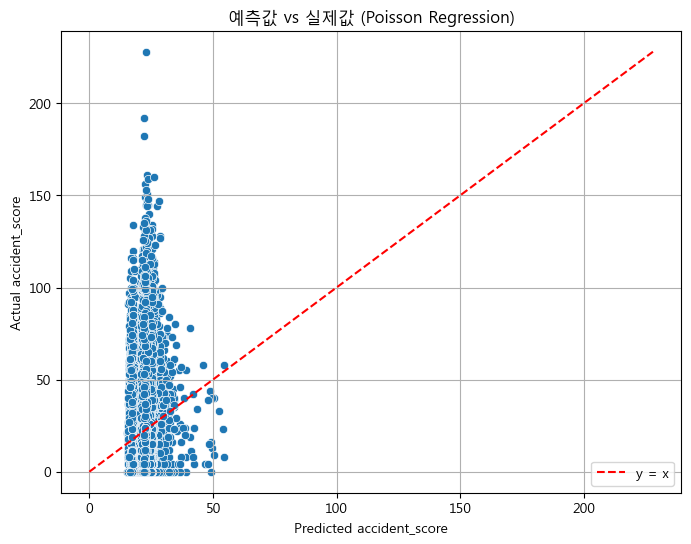

In [106]:
# 1. ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í
df_model = df[['accident_score', 'audience', 'game_count', 'is_post_season', 'is_hometeam_win', 'game_start_time', 'game_end_time', 
               'is_holiday', 'temperature', 'precipitation', 'snow_depth', 'is_ÎÜçÍµ¨', 'is_Î∞∞Íµ¨', 'is_ÏïºÍµ¨', 'is_Ïó¨ÏûêÎ∞∞Íµ¨', 'is_Ï∂ïÍµ¨', 
               'is_Í∏à', 'is_Î™©', 'is_Ïàò', 'is_Ïõî', 'is_Ïùº', 'is_ÌÜ†', 'is_Ìôî', 'weather_condition_ÎßëÏùå', 'weather_condition_ÎπÑ',
               'weather_condition_ÏïΩÍ∞ÑÌùêÎ¶º', 'weather_condition_ÌùêÎ¶º']].copy()

df_model['predicted'] = result.predict(df_model)
df_model['residuals'] = df_model['accident_score'] - df_model['predicted']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='predicted', y='accident_score', data=df_model)
plt.plot([df_model['accident_score'].min(), df_model['accident_score'].max()],
         [df_model['accident_score'].min(), df_model['accident_score'].max()],
         'r--', label='y = x')
plt.xlabel('Predicted accident_score')
plt.ylabel('Actual accident_score')
plt.title('ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í (Poisson Regression)')
plt.legend()
plt.grid(True)
plt.show()

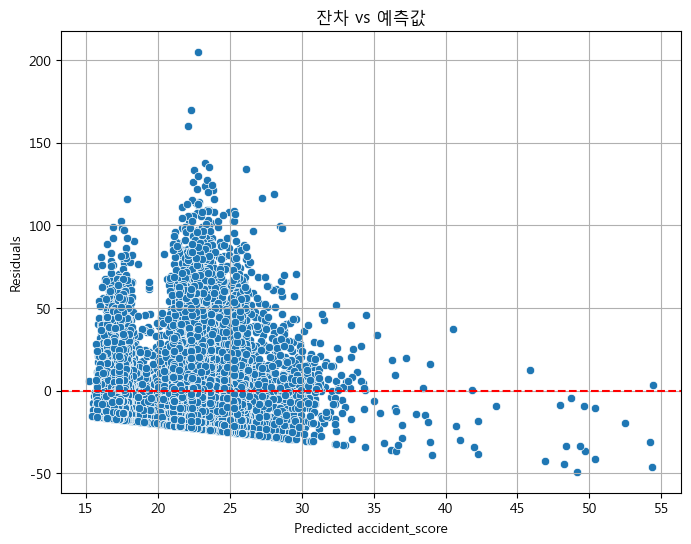

In [107]:
# 2. ÏûîÏ∞® vs ÏòàÏ∏°Í∞í
plt.figure(figsize=(8, 6))
sns.scatterplot(x='predicted', y='residuals', data=df_model)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted accident_score')
plt.ylabel('Residuals')
plt.title('ÏûîÏ∞® vs ÏòàÏ∏°Í∞í')
plt.grid(True)
plt.show()

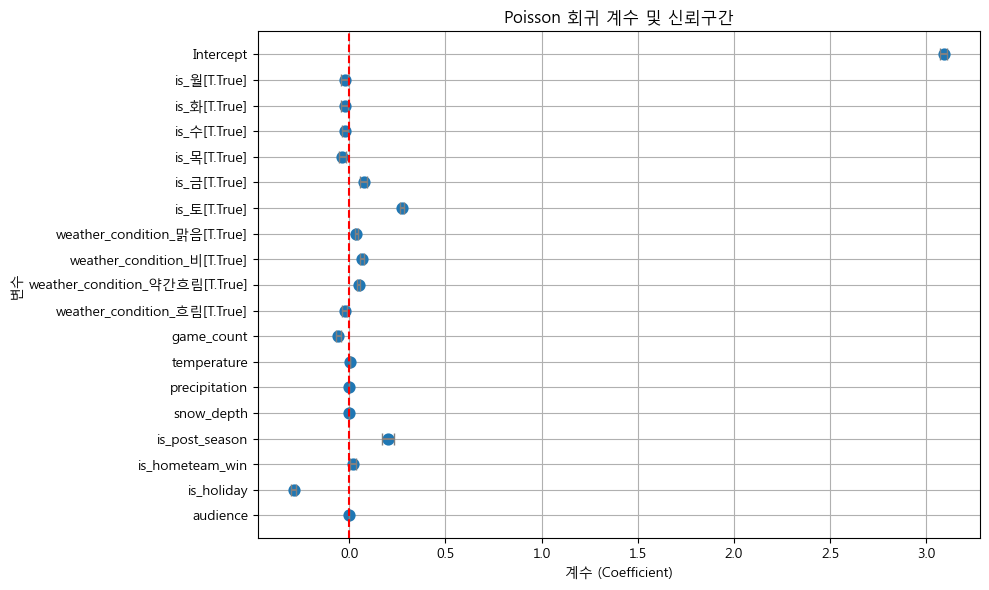

In [112]:
# 3. Í≥ÑÏàò(Coefficient) ÏãúÍ∞ÅÌôî
coef = result.params
conf = result.conf_int()
conf.columns = ['2.5%', '97.5%']
coef_df = pd.concat([coef, conf], axis=1).reset_index()
coef_df.columns = ['variable', 'coefficient', 'ci_lower', 'ci_upper']

plt.figure(figsize=(10, 6))
sns.pointplot(data=coef_df, y='variable', x='coefficient', linestyles='')
plt.errorbar(x=coef_df['coefficient'], y=coef_df['variable'],
             xerr=[coef_df['coefficient'] - coef_df['ci_lower'], coef_df['ci_upper'] - coef_df['coefficient']],
             fmt='none', c='gray', capsize=4)
plt.axvline(0, color='red', linestyle='--')
plt.title('Poisson ÌöåÍ∑Ä Í≥ÑÏàò Î∞è Ïã†Î¢∞Íµ¨Í∞Ñ')
plt.xlabel('Í≥ÑÏàò (Coefficient)')
plt.ylabel('Î≥ÄÏàò')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ïä§Ìè¨Ï∏† Ï¢ÖÎ™©Î≥Ñ ÏÇ¨Í≥†ÏúÑÌóòÎèÑ (`accident_score`) ÏòàÏ∏°: Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

## 1. Î™®Îç∏ Í∞úÏöî

*   **Î™©Ï†Å**: Ïä§Ìè¨Ï∏† Í≤ΩÍ∏∞ Ïú†Î¨¥ Î∞è Ï¢ÖÎ™©Ïóê Îî∞Îùº ÍµêÌÜµÏÇ¨Í≥† ÏúÑÌóòÎèÑ(`accident_score`)Í∞Ä Îã§Î•∏ÏßÄ, Í∑∏Î¶¨Í≥† Ïñ¥Îñ§ ÏöîÏù∏Îì§Ïù¥ ÏÇ¨Í≥† ÏúÑÌóò Ï†êÏàòÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ Ï†ïÎüâÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌï©ÎãàÎã§.
*   **Î™®Îç∏**: Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä (Generalized Linear Model, `family=Poisson`, `link=log`)
*   **Ï¢ÖÏÜçÎ≥ÄÏàò**: `accident_score` (ÏÇ¨Í≥† ÏàòÏôÄ Ïã¨Í∞ÅÎèÑÎ•º Î∞òÏòÅÌïú ÏßÄÌëúÎ°ú Ï∂îÏ†ï)
*   **ÎèÖÎ¶ΩÎ≥ÄÏàò**:
    *   Ïä§Ìè¨Ï∏† Í¥ÄÎ†® Î≥ÄÏàò: `is_post_season` (Ìè¨Ïä§Ìä∏ÏãúÏ¶å Ïó¨Î∂Ä), `is_hometeam_win` (ÌôàÌåÄ ÏäπÎ¶¨ Ïó¨Î∂Ä), `audience` (Í¥ÄÏ§ë Ïàò)
    *   ÏãúÍ∞Ñ Î∞è ÌôòÍ≤Ω Î≥ÄÏàò: `weather_condition` (ÎßëÏùå, ÎπÑ, ÏïΩÍ∞ÑÌùêÎ¶º, ÌùêÎ¶º - Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ), `is_holiday` (Í≥µÌú¥Ïùº Ïó¨Î∂Ä), `temperature` (Í∏∞Ïò®), `precipitation` (Í∞ïÏàòÎüâ), `snow_depth` (Ï†ÅÏÑ§Îüâ)
    *   Í∏∞ÌÉÄ ÏòÅÌñ• ÏöîÏù∏: `Intercept` (Í∏∞Î≥∏ ÏÇ¨Í≥† ÏúÑÌóòÎèÑ)

---

## 2. Î™®Îç∏ Ï†ÅÌï©ÎèÑ

| Ìï≠Î™©                 | ÏïºÍµ¨ (Í≤ΩÍ∏∞ O) | ÏïºÍµ¨ (Í≤ΩÍ∏∞ X) | Ï∂ïÍµ¨ (Í≤ΩÍ∏∞ O) | Ï∂ïÍµ¨ (Í≤ΩÍ∏∞ X) | Î∞∞Íµ¨ (Í≤ΩÍ∏∞ O) | Î∞∞Íµ¨ (Í≤ΩÍ∏∞ X) | Ìï¥ÏÑù                                                                                                |
| :------------------- | :------------ | :------------ | :------------ | :------------ | :------------ | :------------ | :-------------------------------------------------------------------------------------------------- |
| No. Observations     | 1810          | 26699         | 461           | 28048         | 550           | 27959         | Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Îêú Í¥ÄÏ∏°Ïπò Ïàò                                                                                 |
| Log-Likelihood       | -24356        | -3.2156e+05   | -5218.0       | -3.4058e+05   | -7269.6       | -3.3790e+05   | ÎÜíÏùÑÏàòÎ°ù(0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù) Î™®Îç∏ Ï†ÅÌï©ÎèÑ ÏñëÌò∏                                                                 |
| Deviance             | 41560         | 5.3605e+05    | 8241.0        | 5.6914e+05    | 11951         | 5.6417e+05    | ÎÇÆÏùÑÏàòÎ°ù Î™®Îç∏ Ï†ÅÌï©ÎèÑ ÏñëÌò∏. ÏûêÏú†ÎèÑ ÎåÄÎπÑ Í∞íÏù¥ Ïª§ÏÑú Í≥ºÎåÄÏÇ∞Ìè¨ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå.                                              |
| Pearson chi2         | 3.98e+04      | 5.54e+05      | 9.03e+03      | 5.84e+05      | 1.23e+04      | 5.80e+05      | ÎÇÆÏùÑÏàòÎ°ù Î™®Îç∏ Ï†ÅÌï©ÎèÑ ÏñëÌò∏. Í∞íÏù¥ 1Î≥¥Îã§ ÎßéÏù¥ Ïª§ÏÑú Í≥ºÎåÄÏÇ∞Ìè¨ Í∞ÄÎä•ÏÑ± ÏûàÏùå. |
| Pseudo R-squ. (CS)   | 0.4821        | 0.1441        | 0.2853        | 0.1700        | 0.5547        | 0.1719        | 0Í≥º 1 ÏÇ¨Ïù¥ Í∞í, 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏÑ§Î™ÖÎ†• ÎÜíÏùå. Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ† Î™®Îç∏Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÑ§Î™ÖÎ†•Ïù¥ Îçî ÎÜíÏùå.                |

‚û° **Í≤∞Î°†**:
Î™®Îì† Î™®Îç∏ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§ (Log-Likelihood Í∞í). Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú **Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ†Ïùò Î™®Îç∏Îì§Ïù¥ Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ†Ïùò Î™®Îç∏Îì§Î≥¥Îã§ Pseudo R-squared (CS) Í∞íÏù¥ Îçî ÎÜíÍ≤å ÎÇòÌÉÄÎÇò, ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Ïù¥ ÏÇ¨Í≥† ÏúÑÌóòÎèÑÎ•º Îçî Ïûò ÏÑ§Î™Ö**ÌïòÍ≥† ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, Î∞∞Íµ¨ Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ† Î™®Îç∏(0.5547)Ïùò ÏÑ§Î™ÖÎ†•Ïù¥ Í∞ÄÏû• ÎÜíÍ≥†, ÏïºÍµ¨ Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ† Î™®Îç∏(0.4821)ÎèÑ ÎπÑÍµêÏ†Å ÎÜíÏùÄ ÏÑ§Î™ÖÎ†•ÏùÑ Î≥¥ÏûÖÎãàÎã§. Î∞òÎ©¥, Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ† Î™®Îç∏Îì§ÏùÄ Pseudo R-squared Í∞íÏù¥ 0.14~0.17 ÏàòÏ§ÄÏúºÎ°ú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏäµÎãàÎã§.
Deviance Î∞è Pearson chi2 Í∞íÏù¥ ÏûêÏú†ÎèÑ(Df Residuals)Ïóê ÎπÑÌï¥ ÏÉÅÎãπÌûà ÌÅ∞ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ, Î™®Îì† Î™®Îç∏ÏóêÏÑú Í≥ºÎåÄÏÇ∞Ìè¨(overdispersion)Ïùò Í∞ÄÎä•ÏÑ±Ïù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§. Ïù¥Îäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞Ïù¥ Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨Ïùò Í∞ÄÏ†ï(ÌèâÍ∑†=Î∂ÑÏÇ∞)Î≥¥Îã§ ÌÅ¨Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Í≥ÑÏàòÏùò ÌëúÏ§ÄÏò§Ï∞®Í∞Ä Í≥ºÏÜåÏ∂îÏ†ïÎêòÏñ¥ p-valueÍ∞Ä ÏûëÍ≤å ÎÇòÏò¨ Ïàò ÏûàÏäµÎãàÎã§. Ìñ•ÌõÑ Î∂ÑÏÑù Ïãú ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Îì±ÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏäµÎãàÎã§.

---

## 3. Ï£ºÏöî Í≥ÑÏàò Ìï¥ÏÑù (log-link Í∏∞Î∞ò ‚Üí exp(Œ≤) Ìï¥ÏÑù Í∞ÄÎä•)

*   `exp(Œ≤)`: Ìï¥Îãπ Î≥ÄÏàòÍ∞Ä 1Îã®ÏúÑ Ï¶ùÍ∞ÄÌï† Îïå, `accident_score`Ïùò ÌèâÍ∑†Ïù¥ `exp(Œ≤)` Î∞∞ÎßåÌÅº Î≥ÄÌïòÎäî Í≤ÉÏùÑ ÏùòÎØ∏.
    *   `exp(Œ≤) > 1`: ÏúÑÌóòÎèÑ Ï¶ùÍ∞Ä
    *   `exp(Œ≤) < 1`: ÏúÑÌóòÎèÑ Í∞êÏÜå
    *   Ïòà: `Œ≤ = 0.05` Ïù¥Î©¥ `exp(0.05) ‚âà 1.051`, Ï¶â 5.1% Ï¶ùÍ∞Ä. `Œ≤ = -0.1` Ïù¥Î©¥ `exp(-0.1) ‚âà 0.905`, Ï¶â 9.5% Í∞êÏÜå.

| Î≥ÄÏàòÎ™Ö                      | ÎåÄÌëúÏ†Å Í≤ΩÌñ• (Œ≤ Î∂ÄÌò∏) | P-value | Ìï¥ÏÑù ÏöîÏïΩ (ÏùºÎ∞òÏ†Å Í≤ΩÌñ• Î∞è ÌäπÏù¥Ï†ê)                                                                                                                               |
| :-------------------------- | :------------------- | :------ | :---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Intercept (Ï†àÌé∏)**        | **Í≤ΩÍ∏∞ O > Í≤ΩÍ∏∞ X**  | <0.001  | **Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ†Ïùò Í∏∞Î≥∏ ÏÇ¨Í≥† ÏúÑÌóòÎèÑ(exp(Œ≤))Í∞Ä Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ†Î≥¥Îã§ Î™®Îì† Ïä§Ìè¨Ï∏†ÏóêÏÑú ÏïΩ 1.5Î∞∞~1.6Î∞∞ ÎÜíÏùå.** (Ïòà: ÏïºÍµ¨ exp(3.52) ‚âà 33.8 vs exp(3.10) ‚âà 22.2)               |
| `audience`                  | **Í≤ΩÍ∏∞ O: ÎåÄÎ∂ÄÎ∂Ñ +** | <0.001  | **Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†**: Í¥ÄÏ§ë Ïàò Ï¶ùÍ∞ÄÎäî ÏïºÍµ¨, Î∞∞Íµ¨ÏóêÏÑú ÏÇ¨Í≥† ÏúÑÌóòÎèÑ Ï¶ùÍ∞Ä. **Ï∂ïÍµ¨Îäî ÌäπÏù¥ÌïòÍ≤å Í¥ÄÏ§ë Ï¶ùÍ∞Ä Ïãú ÏúÑÌóòÎèÑ Í∞êÏÜå(-2.6e-06)**. **Í≤ΩÍ∏∞ ÏóÜÎäî ÎÇ†**: Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏñëÏùò Í¥ÄÍ≥Ñ(ÏùºÎ∞òÏ†Å ÍµêÌÜµÎüâ Î∞òÏòÅ Í∞ÄÎä•ÏÑ±). |
| `is_holiday`                | **ÏùºÍ¥ÄÎêòÍ≤å -**       | <0.001  | Î™®Îì† Î™®Îç∏ÏóêÏÑú Í≥µÌú¥ÏùºÏùÄ ÏÇ¨Í≥† ÏúÑÌóòÎèÑÎ•º ÎÇÆÏ∂§ (ÏïΩ 14~16% Í∞êÏÜå Ìö®Í≥º, exp(-0.15) ‚âà 0.86).                                                                                 |
| `temperature`               | ÌòºÏû¨                 | Îã§ÏñëÌï®   | Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†: ÏïºÍµ¨/Ï∂ïÍµ¨Îäî Í∏∞Ïò® ÏÉÅÏäπ Ïãú ÏúÑÌóòÎèÑ Í∞êÏÜå, Î∞∞Íµ¨Îäî Ï¶ùÍ∞Ä. Í≤ΩÍ∏∞ ÏóÜÎäî ÎÇ†: Í∏∞Ïò® ÏÉÅÏäπ Ïãú ÏúÑÌóòÎèÑ ÏÜåÌè≠ Ï¶ùÍ∞Ä.                                                               |
| `precipitation`/`snow_depth`| **ÎåÄÎ∂ÄÎ∂Ñ -**         | Îã§ÏñëÌï®   | Í∞ïÏàòÎüâ/Ï†ÅÏÑ§Îüâ Ï¶ùÍ∞ÄÎäî ÎåÄÎ∂ÄÎ∂Ñ Î™®Îç∏ÏóêÏÑú ÏÇ¨Í≥† ÏúÑÌóòÎèÑÎ•º ÎÇÆÏ∂§. Ïù¥Îäî ÏïÖÏ≤úÌõÑ Ïãú Ïö¥Ï†ÑÏûêÍ∞Ä Îçî Ï°∞Ïã¨ÌïòÍ±∞ÎÇò ÌÜµÌñâÎüâ ÏûêÏ≤¥Í∞Ä Ï§ÑÏñ¥Îì§Í∏∞ ÎïåÎ¨∏Ïùº Ïàò ÏûàÏùå.                                            |

‚û° **ÌïµÏã¨ Ìï¥ÏÑù**:
*   **Í≤ΩÍ∏∞ Ïú†Î¨¥Í∞Ä Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•**: Î™®Îì† Ïä§Ìè¨Ï∏†ÏóêÏÑú Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ†Ïùò Í∏∞Î≥∏ `accident_score` (Intercept)Í∞Ä Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ†Î≥¥Îã§ ÏïΩ 1.5~1.6Î∞∞ ÎÜíÏäµÎãàÎã§. Ïù¥Îäî Ïä§Ìè¨Ï∏† Í≤ΩÍ∏∞ ÏûêÏ≤¥Í∞Ä Ï£ºÎ≥Ä ÍµêÌÜµÏÇ¨Í≥† ÏúÑÌóòÏùÑ ÎÜíÏù¥Îäî Ï£ºÏöî ÏöîÏù∏ÏûÑÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
*   **Í¥ÄÏ§ë Ìö®Í≥º**: ÏïºÍµ¨ÏôÄ Î∞∞Íµ¨ÏóêÏÑúÎäî Í¥ÄÏ§ë ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏÇ¨Í≥† ÏúÑÌóòÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Î∞òÎ©¥, Ï∂ïÍµ¨ÏóêÏÑúÎäî Ïò§ÌûàÎ†§ Í¥ÄÏ§ë ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏÇ¨Í≥† ÏúÑÌóòÏù¥ ÏÜåÌè≠ Í∞êÏÜåÌïòÎäî ÌäπÏù¥Ìïú Í≤∞Í≥ºÍ∞Ä ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
*   **ÎÇ†Ïî®Ïùò Î≥µÌï©Ï†Å ÏòÅÌñ•**: Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†, ÌäπÌûà ÏïºÍµ¨ÏôÄ Î∞∞Íµ¨ÏóêÏÑúÎäî Í∂ÇÏùÄ ÎÇ†Ïî®(ÎπÑ, ÌùêÎ¶º Îì±)Í∞Ä Ïò§ÌûàÎ†§ ÏÇ¨Í≥† ÏúÑÌóòÎèÑÎ•º ÎÇÆÏ∂îÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎäîÎç∞, Ïù¥Îäî Í¥ÄÏ§ë Í∞êÏÜå ÎòêÎäî Ïö¥Ï†ÑÏûêÎì§Ïùò Ï£ºÏùòÎ†• Ï¶ùÍ∞Ä ÎïåÎ¨∏Ïùº Ïàò ÏûàÏäµÎãàÎã§. Î∞òÎ©¥ Í≤ΩÍ∏∞ ÏóÜÎäî ÎÇ†ÏóêÎäî ÏùºÎ∞òÏ†ÅÏù∏ ÏòàÏÉÅÍ≥º Ïú†ÏÇ¨ÌïòÍ≤å ÏùºÎ∂Ä Í∂ÇÏùÄ ÎÇ†Ïî®Í∞Ä ÏúÑÌóòÎèÑÎ•º ÎÜíÏûÖÎãàÎã§.
*   **Í≥µÌú¥Ïùº Ìö®Í≥º**: Í≥µÌú¥ÏùºÏùÄ Î™®Îì† Í≤ΩÏö∞Ïóê ÏÇ¨Í≥† ÏúÑÌóòÎèÑÎ•º ÏùºÍ¥ÄÎêòÍ≤å ÎÇÆÏ∂îÎäî Ìö®Í≥ºÍ∞Ä ÏûàÏóàÏäµÎãàÎã§.

---

## 4. Î™®Îç∏ ÌäπÏù¥Ï†ê Î∞è ÎπÑÍµê

1.  **Í≤ΩÍ∏∞ Ïú†Î¨¥Ïóê Îî∞Î•∏ `Intercept` Ï∞®Ïù¥**:
    *   ÏïºÍµ¨: Í≤ΩÍ∏∞ O (3.52) vs Í≤ΩÍ∏∞ X (3.11) ‚Üí `exp(3.52)/exp(3.11)` ‚âà 1.51Î∞∞
    *   Ï∂ïÍµ¨: Í≤ΩÍ∏∞ O (3.56) vs Í≤ΩÍ∏∞ X (3.11) ‚Üí `exp(3.56)/exp(3.11)` ‚âà 1.57Î∞∞
    *   Î∞∞Íµ¨: Í≤ΩÍ∏∞ O (3.53) vs Í≤ΩÍ∏∞ X (3.08) ‚Üí `exp(3.53)/exp(3.08)` ‚âà 1.57Î∞∞
    *   Î™®Îì† Ïä§Ìè¨Ï∏†ÏóêÏÑú Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ†Ïùò Í∏∞Î≥∏ ÏÇ¨Í≥† ÏúÑÌóòÏù¥ Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ†Î≥¥Îã§ ÏïΩ 50~60% ÎÜíÍ≤å ÏãúÏûëÌï©ÎãàÎã§.

2.  **Ïä§Ìè¨Ï∏† Ï¢ÖÎ™©Î≥Ñ `audience` Ìö®Í≥º (Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†)**:
    *   ÏïºÍµ¨: `coef = 1.046e-05` (ÏñëÏàò). Í¥ÄÏ§ë 1Îßå Î™Ö Ï¶ùÍ∞Ä Ïãú ÏÇ¨Í≥†ÏúÑÌóò `exp(1.046e-05 * 10000)` = `exp(0.1046)` ‚âà 1.11Î∞∞ (ÏïΩ 11% Ï¶ùÍ∞Ä).
    *   Ï∂ïÍµ¨: `coef = -2.604e-06` (ÏùåÏàò). Í¥ÄÏ§ë 1Îßå Î™Ö Ï¶ùÍ∞Ä Ïãú ÏÇ¨Í≥†ÏúÑÌóò `exp(-2.604e-06 * 10000)` = `exp(-0.02604)` ‚âà 0.974Î∞∞ (ÏïΩ 2.6% Í∞êÏÜå).
    *   Î∞∞Íµ¨: `coef = 3.26e-05` (ÏñëÏàò). Í¥ÄÏ§ë 1Îßå Î™Ö Ï¶ùÍ∞Ä Ïãú ÏÇ¨Í≥†ÏúÑÌóò `exp(3.26e-05 * 10000)` = `exp(0.326)` ‚âà 1.385Î∞∞ (ÏïΩ 38.5% Ï¶ùÍ∞Ä).
    *   Î∞∞Íµ¨Ïùò Í¥ÄÏ§ë Îãπ ÏúÑÌóòÎèÑ Ï¶ùÍ∞ÄÏú®Ïù¥ Í∞ÄÏû• ÌÅ¨Î©∞, Ï∂ïÍµ¨Îäî Ïú†ÏùºÌïòÍ≤å ÏùåÏùò Í¥ÄÍ≥ÑÎ•º Î≥¥ÏûÖÎãàÎã§.

3.  **`is_post_season` Ìö®Í≥º (Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†)**:
    *   ÏïºÍµ¨: `coef = 0.4059`. Ìè¨Ïä§Ìä∏ÏãúÏ¶å Ïãú ÏÇ¨Í≥† ÏúÑÌóò ÏïΩ `exp(0.4059)` ‚âà 1.50Î∞∞ (ÏïΩ 50% Ï¶ùÍ∞Ä).
    *   Ï∂ïÍµ¨: `coef = -0.0702`. Ìè¨Ïä§Ìä∏ÏãúÏ¶å Ïãú ÏÇ¨Í≥† ÏúÑÌóò ÏïΩ `exp(-0.0702)` ‚âà 0.932Î∞∞ (ÏïΩ 6.8% Í∞êÏÜå).
    *   Î∞∞Íµ¨: P-value > 0.05Î°ú Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå.
    *   ÏïºÍµ¨ Ìè¨Ïä§Ìä∏ÏãúÏ¶åÏùò ÏúÑÌóòÎèÑ Ï¶ùÍ∞ÄÍ∞Ä ÎëêÎìúÎü¨ÏßëÎãàÎã§.

4.  **ÎÇ†Ïî® Î≥ÄÏàòÏùò ÏÉÅÎ∞òÎêú Ìö®Í≥º**:
    *   **Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ† (ÏïºÍµ¨, Î∞∞Íµ¨)**: `weather_condition_ÎßëÏùå[T.True]`, `weather_condition_ÎπÑ[T.True]` Îì±Ïù¥ Î™®Îëê ÏùåÏàò Í≥ÑÏàòÎ•º Í∞ÄÏßëÎãàÎã§. Ïù¥Îäî Í∏∞Ï§Ä ÎÇ†Ïî®(Ïòà: 'Íµ¨Î¶ÑÏ°∞Í∏à' Îì± Î™ÖÏãúÎêòÏßÄ ÏïäÏùÄ Í∏∞Î≥∏Í∞í)Î≥¥Îã§ ÎßëÍ±∞ÎÇò ÎπÑÍ∞Ä Ïò§Í±∞ÎÇò ÌùêÎ¶∞ ÎÇ†Ïóê ÏÇ¨Í≥† ÏúÑÌóòÏù¥ ÎÇÆÏïÑÏßêÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Îäî Í≤ΩÍ∏∞ ÎãπÏùº ÎÇ†Ïî®Í∞Ä Ï¢ãÏßÄ ÏïäÏúºÎ©¥ Í¥ÄÎûåÍ∞ù ÏàòÍ∞Ä Ï§ÑÍ±∞ÎÇò, Ïö¥Ï†ÑÏûêÎì§Ïù¥ Îçî Ï£ºÏùòÌïòÍ∏∞ ÎïåÎ¨∏Ïùº Ïàò ÏûàÏäµÎãàÎã§.
    *   **Í≤ΩÍ∏∞ ÏóÜÎäî ÎÇ†**: ÎåÄÏ≤¥Î°ú `weather_condition_ÎßëÏùå[T.True]`, `weather_condition_ÎπÑ[T.True]` Îì±Ïù¥ ÏñëÏàò Í≥ÑÏàòÎ•º Í∞ÄÏ†∏, Í∏∞Ï§Ä ÎÇ†Ïî®Î≥¥Îã§ ÏÇ¨Í≥† ÏúÑÌóòÏù¥ ÎÜíÏïÑÏßêÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Îäî ÏùºÎ∞òÏ†ÅÏù∏ ÍµêÌÜµ ÏÉÅÌô©ÏóêÏÑúÏùò ÎÇ†Ïî® Ìö®Í≥ºÏôÄ Ïú†ÏÇ¨Ìï©ÎãàÎã§.

5.  **Í≥ºÎåÄÏÇ∞Ìè¨ (Overdispersion)**: Î™®Îì† Î™®Îç∏ÏóêÏÑú `Scale`Ïù¥ 1.0000ÏúºÎ°ú Í≥†Ï†ïÎêòÏñ¥ ÏûàÏßÄÎßå, `Pearson chi2 / Df Residuals` ÎπÑÏú®Ïù¥ 1Î≥¥Îã§ Ìõ®Ïî¨ ÌÅΩÎãàÎã§ (Ïòà: ÏïºÍµ¨ Í≤ΩÍ∏∞ OÏùò Í≤ΩÏö∞ 39800 / 1799 ‚âà 22.1). Ïù¥Îäî Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞Ïù¥ ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§Îäî Ïã†Ìò∏Î°ú, Ìè¨ÏïÑÏÜ° Î™®Îç∏Ïùò Í∞ÄÏ†ïÏùÑ ÏúÑÎ∞∞Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Í≤ΩÏö∞ ÌëúÏ§ÄÏò§Ï∞®Í∞Ä Í≥ºÏÜåÌèâÍ∞ÄÎêòÏñ¥ Î≥ÄÏàòÎì§Ïù¥ Ïã§Ï†úÎ≥¥Îã§ Îçî Ïú†ÏùòÌïòÍ≤å ÎÇòÏò¨ Ïàò ÏûàÏäµÎãàÎã§.

---

## 5. Í≤∞Î°† Î∞è Ï†úÏñ∏

### üéØ ÌïµÏã¨ Í≤∞Î°†

1.  **Ïä§Ìè¨Ï∏† Í≤ΩÍ∏∞ Í∞úÏµúÎäî Í∑∏ ÏûêÏ≤¥Î°ú Ï£ºÎ≥Ä ÏßÄÏó≠Ïùò ÍµêÌÜµÏÇ¨Í≥† ÏúÑÌóòÎèÑ(`accident_score`)Î•º ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏïΩ 1.5~1.6Î∞∞ ÎÜíÏù¥Îäî Í∞ÄÏû• Í∞ïÎ†•Ìïú ÏöîÏù∏ÏûÖÎãàÎã§.**
2.  **Í¥ÄÏ§ë Ïàò**Îäî ÏïºÍµ¨ÏôÄ Î∞∞Íµ¨ Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ† ÏÇ¨Í≥† ÏúÑÌóòÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Î∞òÎ©¥, Ï∂ïÍµ¨ Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ†ÏóêÎäî Ïò§ÌûàÎ†§ ÏÜåÌè≠ Í∞êÏÜåÏãúÌÇ§Îäî ÎèÖÌäπÌïú ÏñëÏÉÅÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§. Ïù¥Îäî Ï∂ïÍµ¨ Í≤ΩÍ∏∞ ÏãúÏùò ÍµêÌÜµ Í¥ÄÎ¶¨ÎÇò ÏïàÏ†Ñ ÎåÄÏ±ÖÏù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçî Ìö®Í≥ºÏ†ÅÏùº Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
3.  **Ìè¨Ïä§Ìä∏ÏãúÏ¶å**ÏùÄ ÏïºÍµ¨ Í≤ΩÍ∏∞ Ïãú ÏúÑÌóòÎèÑÎ•º ÌÅ¨Í≤å ÎÜíÏù¥ÏßÄÎßå(ÏïΩ 50% Ï¶ùÍ∞Ä), Ï∂ïÍµ¨ Í≤ΩÍ∏∞ ÏãúÏóêÎäî Ïò§ÌûàÎ†§ ÎÇÆÏ∂îÎäî Ìö®Í≥ºÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. Î∞∞Íµ¨Îäî Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•Ïù¥ ÏóÜÏóàÏäµÎãàÎã§.
4.  **ÎÇ†Ïî®**Ïùò ÏòÅÌñ•ÏùÄ Í≤ΩÍ∏∞ Ïú†Î¨¥Ïóê Îî∞Îùº Îã§Î•¥Í≤å ÎÇòÌÉÄÎÇ©ÎãàÎã§. Í≤ΩÍ∏∞ ÎãπÏùºÏóêÎäî (ÌäπÌûà ÏïºÍµ¨/Î∞∞Íµ¨) Í∂ÇÏùÄ ÎÇ†Ïî®Í∞Ä Ïò§ÌûàÎ†§ ÏÇ¨Í≥† ÏúÑÌóòÏùÑ ÎÇÆÏ∂îÎäî Í≤ΩÌñ•Ïù¥ Í¥ÄÏ∞∞ÎêòÎäîÎç∞, Ïù¥Îäî Í¥ÄÏ§ë Ïàò Í∞êÏÜå ÎòêÎäî Ïö¥Ï†Ñ ÌñâÌÉú Î≥ÄÌôîÏôÄ Í¥ÄÎ†®Îê† Ïàò ÏûàÏäµÎãàÎã§.
5.  **Í≥µÌú¥Ïùº**ÏùÄ ÏùºÍ¥ÄÎêòÍ≤å ÏÇ¨Í≥† ÏúÑÌóòÏùÑ ÎÇÆÏ∂îÎäî ÏöîÏù∏ÏúºÎ°ú ÏûëÏö©ÌñàÏäµÎãàÎã§.
6.  **Í∞ïÏàòÎüâ/Ï†ÅÏÑ§Îüâ** Ï¶ùÍ∞ÄÎäî ÎåÄÎ∂ÄÎ∂Ñ ÏÇ¨Í≥† ÏúÑÌóòÏùÑ ÎÇÆÏ∂îÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇò, ÏïÖÏ≤úÌõÑ Ïãú ÍµêÌÜµÎüâ Í∞êÏÜå ÎòêÎäî Ïö¥Ï†ÑÏûêÎì§Ïùò Í≤ΩÍ∞ÅÏã¨ Ï¶ùÍ∞ÄÎ•º Î∞òÏòÅÌï† Ïàò ÏûàÏäµÎãàÎã§.

### ‚úÖ Ìñ•ÌõÑ Ï†úÏñ∏

1.  **ÎßûÏ∂§Ìòï ÍµêÌÜµ Í¥ÄÎ¶¨ Ï†ÑÎûµ ÏàòÎ¶Ω**:
    *   Î™®Îì† Ïä§Ìè¨Ï∏† Í≤ΩÍ∏∞ ÎãπÏùº, ÌäπÌûà ÏïºÍµ¨ Ìè¨Ïä§Ìä∏ÏãúÏ¶å Í≤ΩÍ∏∞ ÏãúÏóêÎäî Í∞ïÌôîÎêú ÍµêÌÜµ Í¥ÄÎ¶¨ Î∞è ÏïàÏ†Ñ ÎåÄÏ±ÖÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.
    *   Î∞∞Íµ¨ Í≤ΩÍ∏∞ ÏãúÏóêÎäî Í¥ÄÏ§ë Ïàò Ï¶ùÍ∞ÄÏóê Îî∞Î•∏ ÏúÑÌóòÎèÑ ÏÉÅÏäπÌè≠Ïù¥ ÌÅ¨ÎØÄÎ°ú, Í¥ÄÏ§ë Í∑úÎ™®Ïóê Îî∞Î•∏ ÌÉÑÎ†•Ï†Å ÎåÄÏùëÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
    *   Ï∂ïÍµ¨ Í≤ΩÍ∏∞ Ïãú Í¥ÄÏ§ë Ï¶ùÍ∞ÄÍ∞Ä ÏúÑÌóòÎèÑ Í∞êÏÜåÎ°ú Ïù¥Ïñ¥ÏßÑ ÏõêÏù∏(Ïòà: ÌäπÏ†ï ÍµêÌÜµ ÌÜµÏ†ú Î∞©Ïãù, ÎåÄÏ§ëÍµêÌÜµ Ïù¥Ïö© Ïú†ÎèÑ Ï∫†ÌéòÏù∏ Îì±)ÏùÑ ÌååÏïÖÌïòÏó¨ Îã§Î•∏ Ïä§Ìè¨Ï∏†ÏóêÎèÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎäîÏßÄ Í≤ÄÌÜ†Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.

2.  **Î™®Îç∏ Í∞úÏÑ†**:
    *   Î™®Îì† Î™®Îç∏ÏóêÏÑú Í¥ÄÏ∞∞Îêú **Í≥ºÎåÄÏÇ∞Ìè¨(overdispersion)** Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥, Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä ÎåÄÏã† **ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä(Negative Binomial Regression)** Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÏó¨ Í≤∞Í≥ºÏùò Í∞ïÍ±¥ÏÑ±(robustness)ÏùÑ ÎÜíÏùº ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.
    *   ÎÇ†Ïî® Î≥ÄÏàòÏùò Í≤ΩÏö∞, Îã®Ïàú Í∏∞ÏÉÅ ÏÉÅÌÉú Ïô∏Ïóê 'Í≤ΩÍ∏∞ ÎãπÏùº ÏòàÎ≥¥Îêú ÎÇ†Ïî®'ÏôÄ 'Ïã§Ï†ú ÎÇ†Ïî®'Ïùò Ï∞®Ïù¥, ÎòêÎäî ÌäπÏ†ï Í∏∞ÏÉÅ Ï°∞Í±¥Í≥º Í¥ÄÏ§ë Ïàò Í∞ÑÏùò **ÏÉÅÌò∏ÏûëÏö© Ìï≠(interaction term)**ÏùÑ Î™®Îç∏Ïóê Ï∂îÍ∞ÄÌïòÏó¨ Î≥¥Îã§ Ï†ïÍµêÌïú Î∂ÑÏÑùÏùÑ ÏãúÎèÑÌï† Ïàò ÏûàÏäµÎãàÎã§.
    *   `audience` Î≥ÄÏàòÎäî Í≤ΩÍ∏∞ ÏóÜÎäî ÎÇ†ÏóêÎäî 0Ïù¥Í±∞ÎÇò Îß§Ïö∞ ÎÇÆÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÎäîÎç∞, Ìï¥Îãπ Î™®Îç∏ÏóêÏÑú Ïú†ÏùòÌïòÍ≤å ÎÇòÏò® Í≤ÉÏùÄ ÏßÄÏó≠ ÎÇ¥ Îã§Î•∏ Ïú†ÎèôÏù∏Íµ¨Î•º Î∞òÏòÅÌï† Ïàò ÏûàÏúºÎØÄÎ°ú Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î≤îÏúÑÎ•º Î™ÖÌôïÌûà Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

3.  **Ïã¨Ï∏µ Î∂ÑÏÑù**:
    *   Ï∂ïÍµ¨ Í≤ΩÍ∏∞ÏóêÏÑú Í¥ÄÏ§ë ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏÇ¨Í≥† ÏúÑÌóòÏù¥ ÎÇÆÏïÑÏßÄÎäî ÌòÑÏÉÅ, Í∞ïÏàò/Ï†ÅÏÑ§ Ïãú ÏÇ¨Í≥† ÏúÑÌóòÏù¥ ÎÇÆÏïÑÏßÄÎäî ÌòÑÏÉÅÏóê ÎåÄÌï¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†ïÏÑ±Ï†Å, Ï†ïÎüâÏ†Å Ïó∞Íµ¨(Ïòà: ÏÑ§Î¨∏Ï°∞ÏÇ¨, ÌòÑÏû• Í¥ÄÏ∞∞, ÏÑ∏Î∂Ä ÍµêÌÜµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù)Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.
    *   `is_hometeam_win` Î≥ÄÏàòÏùò Í≤ΩÏö∞, Í≤ΩÍ∏∞ ÌõÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏÇ¨Í≥† Î∞úÏÉù Ìå®ÌÑ¥Í≥º Ïó∞Í¥ÄÏßÄÏñ¥ Î∂ÑÏÑùÌïòÎ©¥ Îçî ÏùòÎØ∏ ÏûàÎäî Ìï¥ÏÑùÏù¥ Í∞ÄÎä•Ìï† Ïàò ÏûàÏäµÎãàÎã§ (Ïòà: ÏäπÎ¶¨ ÌõÑ Ï∂ïÌïò ÌñâÏúÑÎ°ú Ïù∏Ìïú ÏúÑÌóò Ï¶ùÍ∞Ä Îì±).

# Í≥ºÎåÄÏÇ∞Ìè¨(overdispersion) Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥, Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä ÎåÄÏã† ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä(Negative Binomial Regression) Î™®Îç∏ÏùÑ Ï†ÅÏö©

In [ ]:
game_day_baseball = df[df['is_ÏïºÍµ¨'] == True] # Î™ÖÏãúÏ†ÅÏúºÎ°ú TrueÏôÄ ÎπÑÍµê

formula = """accident_score ~ is_post_season + is_hometeam_win + audience + is_holiday + temperature + precipitation + snow_depth +
        C(weather_condition_ÎßëÏùå, Treatment(reference=False)) + 
        C(weather_condition_ÎπÑ, Treatment(reference=False)) + 
        C(weather_condition_ÏïΩÍ∞ÑÌùêÎ¶º, Treatment(reference=False)) + 
        C(weather_condition_ÌùêÎ¶º, Treatment(reference=False))"""

# ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
# alphaÎäî Í≥ºÎåÄÏÇ∞Ìè¨ Î™®ÏàòÎ°ú, statsmodelsÍ∞Ä ÏûêÎèôÏúºÎ°ú Ï∂îÏ†ïÌï©ÎãàÎã§.
# ÎßåÏïΩ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÍ±∞ÎÇò Î™®Îç∏ ÏàòÎ†¥Ïóê Î¨∏Ï†úÍ∞Ä ÏûàÎã§Î©¥ alpha Í∞íÏùÑ Í≥†Ï†ïÌï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
# (Ïòà: family=sm.families.NegativeBinomial(alpha=0.1))
# Ïó¨Í∏∞ÏÑúÎäî statsmodelsÍ∞Ä Ï∂îÏ†ïÌïòÎèÑÎ°ù Îë°ÎãàÎã§.
model_nb_game_baseball = smf.glm(
    formula=formula,
    data=game_day_baseball,
    family=sm.families.NegativeBinomial() # ÏùåÏù¥Ìï≠ Î∂ÑÌè¨ ÏÇ¨Ïö©
)
result_nb_game_baseball = model_nb_game_baseball.fit()
print("ÏïºÍµ¨ - Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ† (ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä)")
print(result_nb_game_baseball.summary())
# Ï∂îÏ†ïÎêú alpha Í∞í ÌôïÏù∏ (Í≥ºÎåÄÏÇ∞Ìè¨ Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÉÑ)
# alphaÍ∞Ä 0Ïóê Í∞ÄÍπåÏö∞Î©¥ Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨ÏôÄ Ïú†ÏÇ¨Ìï¥ÏßëÎãàÎã§.
if hasattr(result_nb_game_baseball.model.family, 'alpha'):
    print(f"Estimated alpha (game day, baseball): {result_nb_game_baseball.model.family.alpha}\n")


# 2. ÏïºÍµ¨ - Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ† (ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä)
no_game_day_baseball = df[df['is_ÏïºÍµ¨'] == False] # Î™ÖÏãúÏ†ÅÏúºÎ°ú FalseÏôÄ ÎπÑÍµê

model_nb_no_game_baseball = smf.glm(
    formula=formula,
    data=no_game_day_baseball,
    family=sm.families.NegativeBinomial() # ÏùåÏù¥Ìï≠ Î∂ÑÌè¨ ÏÇ¨Ïö©
)
result_nb_no_game_baseball = model_nb_no_game_baseball.fit()
print("ÏïºÍµ¨ - Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ† (ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä)")
print(result_nb_no_game_baseball.summary())
if hasattr(result_nb_no_game_baseball.model.family, 'alpha'):
    print(f"Estimated alpha (no game day, baseball): {result_nb_no_game_baseball.model.family.alpha}\n")

# 3. Îã§Î•∏ Ïä§Ìè¨Ï∏†(Ï∂ïÍµ¨, Î∞∞Íµ¨ Îì±) Î∞è Í≤ΩÍ∏∞ Ïú†Î¨¥Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÎèôÏùºÌïòÍ≤å Ï†ÅÏö© Í∞ÄÎä•
# game_day_soccer = df[df['is_Ï∂ïÍµ¨'] == True]
# model_nb_game_soccer = smf.glm(formula=formula, data=game_day_soccer, family=sm.families.NegativeBinomial())
# result_nb_game_soccer = model_nb_game_soccer.fit()
# print("Ï∂ïÍµ¨ - Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ† (ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä)")
# print(result_nb_game_soccer.summary())
# if hasattr(result_nb_game_soccer.model.family, 'alpha'):
#     print(f"Estimated alpha (game day, soccer): {result_nb_game_soccer.model.family.alpha}\n")

ÏïºÍµ¨ - Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ† (ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä)
                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                 1810
Model:                            GLM   Df Residuals:                     1799
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7662.6
Date:                    Î™©, 05 6 2025   Deviance:                       3336.6
Time:                        15:13:23   Pearson chi2:                 1.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02731
Covariance Type:            nonrobust                                         
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

c:\Users\stagv\anaconda3\envs\testenv\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\stagv\anaconda3\envs\testenv\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


# ÏïºÍµ¨ - Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ†: ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

## 1. Î™®Îç∏ Í∞úÏöî

*   **Î™©Ï†Å**: ÏïºÍµ¨ Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ† ÍµêÌÜµÏÇ¨Í≥† ÏúÑÌóò Ï†êÏàò(`accident_score`)Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏ÏùÑ ÌèâÍ∞ÄÌïòÎêò, Îç∞Ïù¥ÌÑ∞Ïùò Í≥ºÎåÄÏÇ∞Ìè¨(overdispersion)Î•º Í≥†Î†§ÌïòÏó¨ Î≥¥Îã§ Ïã†Î¢∞ÏÑ± ÏûàÎäî Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌï©ÎãàÎã§.
*   **Î™®Îç∏**: ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä (Generalized Linear Model, `family=NegativeBinomial`, `link=log`)
    *   ÏùåÏù¥Ìï≠ ÌöåÍ∑ÄÎäî Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞Ïù¥ Í∞ôÎã§Îäî Í∞ÄÏ†ïÏùÑ ÏôÑÌôîÌïòÏó¨, Î∂ÑÏÇ∞Ïù¥ ÌèâÍ∑†Î≥¥Îã§ ÌÅ∞ Í≥ºÎåÄÏÇ∞Ìè¨ Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏ÎßÅÌïòÎäî Îç∞ Ï†ÅÌï©Ìï©ÎãàÎã§.
*   **Ï¢ÖÏÜçÎ≥ÄÏàò**: `accident_score`
*   **ÎèÖÎ¶ΩÎ≥ÄÏàò**:
    *   Ïä§Ìè¨Ï∏† Í¥ÄÎ†® Î≥ÄÏàò: `is_post_season`, `is_hometeam_win`, `audience`
    *   ÏãúÍ∞Ñ Î∞è ÌôòÍ≤Ω Î≥ÄÏàò: `weather_condition` (ÎßëÏùå, ÎπÑ, ÏïΩÍ∞ÑÌùêÎ¶º, ÌùêÎ¶º - Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ), `is_holiday`, `temperature`, `precipitation`, `snow_depth`
    *   Í∏∞ÌÉÄ ÏòÅÌñ• ÏöîÏù∏: `Intercept`

---

## 2. Î™®Îç∏ Ï†ÅÌï©ÎèÑ (ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä vs. Ïù¥Ï†Ñ Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä ÎπÑÍµê)

| Ìï≠Î™©                     | ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä (ÏïºÍµ¨, Í≤ΩÍ∏∞ O) | Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä (ÏïºÍµ¨, Í≤ΩÍ∏∞ O - Ïù¥Ï†Ñ Í≤∞Í≥º) | Ìï¥ÏÑù                                                                                                                                                              |
| :----------------------- | :------------------------- | :------------------------------------- | :---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| No. Observations         | 1810                       | 1810                                   | ÎèôÏùºÌïú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©                                                                                                                                                  |
| Model Family             | **NegativeBinomial**       | Poisson                                | ÏùåÏù¥Ìï≠ Î∂ÑÌè¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÎåÄÏÇ∞Ìè¨ Ï≤òÎ¶¨                                                                                                                                |
| Log-Likelihood           | **-7662.6**                | -24356                                 | ÏßÅÏ†ë ÎπÑÍµêÎäî Ïñ¥Î†µÏßÄÎßå, ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í≥ºÎåÄÏÇ∞Ìè¨Í∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏùåÏù¥Ìï≠ Î™®Îç∏Ïùò Î°úÍ∑∏Ïö∞ÎèÑÍ∞íÏù¥ Îçî ÎÜíÍ≤å(Îçú ÏùåÏàò) ÎÇòÌÉÄÎÇ† Ïàò ÏûàÏùå (Î™®Îç∏ Î≥µÏû°ÎèÑ Í≥†Î†§ ÌïÑÏöî).                               |
| Deviance                 | **3336.6**                 | 41560                                  | **Îß§Ïö∞ ÌÅ¨Í≤å Í∞êÏÜå.** ÎÇÆÏùÑÏàòÎ°ù Î™®Îç∏ Ï†ÅÌï©ÎèÑÍ∞Ä Ï¢ãÏúºÎ©∞, Ïù¥Îäî ÏùåÏù¥Ìï≠ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Îçî Ïûò ÏÑ§Î™ÖÌï®ÏùÑ ÏãúÏÇ¨.                                                              |
| Pearson chi2             | **1.58e+03 (1580)**        | 3.98e+04 (39800)                       | **Îß§Ïö∞ ÌÅ¨Í≤å Í∞êÏÜå.** DevianceÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏùåÏù¥Ìï≠ Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ Ìñ•ÏÉÅÏùÑ Î≥¥Ïó¨Ï§å.                                                                                              |
| Pseudo R-squ. (CS)       | **0.02731**                | 0.4821                                 | **ÌÅ¨Í≤å Í∞êÏÜå.** Ìè¨ÏïÑÏÜ° Î™®Îç∏Ïùò Pseudo R-squaredÎäî Í≥ºÎåÄÏÇ∞Ìè¨Î°ú Ïù∏Ìï¥ Î∂ÄÌíÄÎ†§Ï°åÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå. ÏùåÏù¥Ìï≠ Î™®Îç∏Ïùò Í∞íÏùÄ Í≥ºÎåÄÏÇ∞Ìè¨Î•º Í≥†Î†§Ìïú ÌõÑÏùò ÏÑ§Î™ÖÎ†•ÏúºÎ°ú, Îçî Î≥¥ÏàòÏ†ÅÏù¥Í≥† ÌòÑÏã§Ï†ÅÏù∏ ÏàòÏπòÏùº Ïàò ÏûàÏùå. |
| **Estimated alpha**      | **1.0**                    | (Ìï¥Îãπ ÏóÜÏùå)                            | **Í≥ºÎåÄÏÇ∞Ìè¨ Î™®Ïàò(alpha)Í∞Ä 1.0ÏúºÎ°ú Ï∂îÏ†ïÎê®.** Ïù¥Îäî Îç∞Ïù¥ÌÑ∞Ïóê ÏÉÅÎãπÌïú Í≥ºÎåÄÏÇ∞Ìè¨Í∞Ä ÏûàÏóàÏúºÎ©∞, Ìè¨ÏïÑÏÜ° Î™®Îç∏Î≥¥Îã§ ÏùåÏù¥Ìï≠ Î™®Îç∏Ïù¥ Îçî Ï†ÅÌï©ÌñàÏùåÏùÑ Í∞ïÎ†•Ìûà ÏãúÏÇ¨Ìï®. alpha=0Ïù¥Î©¥ Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨ÏôÄ Ïú†ÏÇ¨.  |
| **Pearson chi2 / Df Res** | **1580 / 1799 ‚âà 0.878**    | 39800 / 1799 ‚âà 22.1                    | **1Ïóê Îß§Ïö∞ Í∞ÄÍπåÏõåÏßê.** Ìè¨ÏïÑÏÜ° Î™®Îç∏ÏóêÏÑúÎäî 1Î≥¥Îã§ Ìõ®Ïî¨ Ïª§ Í≥ºÎåÄÏÇ∞Ìè¨Î•º ÎÇòÌÉÄÎÉàÏúºÎÇò, ÏùåÏù¥Ìï≠ Î™®Îç∏ÏóêÏÑúÎäî Ïù¥ ÎπÑÏú®Ïù¥ 1Ïóê Í∑ºÏ†ëÌïòÏó¨ Í≥ºÎåÄÏÇ∞Ìè¨Í∞Ä Ìö®Í≥ºÏ†ÅÏúºÎ°ú Ï†úÏñ¥ÎêòÏóàÏùåÏùÑ Î≥¥Ïó¨Ï§å.                   |

‚û° **Í≤∞Î°†**:
**ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Î™®Îç∏Ïù¥ Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä Î™®Îç∏Î≥¥Îã§ ÏïºÍµ¨ Í≤ΩÍ∏∞ ÏûàÎäî ÎÇ†Ïùò `accident_score` Îç∞Ïù¥ÌÑ∞Ïóê Ìõ®Ïî¨ Îçî Ï†ÅÌï©Ìï©ÎãàÎã§.**
Ïù¥Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏßÄÌëúÎì§ÏùÑ ÌÜµÌï¥ Î™ÖÌôïÌûà ÎìúÎü¨ÎÇ©ÎãàÎã§:
1.  **Í≥ºÎåÄÏÇ∞Ìè¨ Ï†úÏñ¥**: `Estimated alpha` Í∞íÏù¥ 1.0ÏúºÎ°ú Ï∂îÏ†ïÎêòÏñ¥ Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïóê ÏÉÅÎãπÌïú Í≥ºÎåÄÏÇ∞Ìè¨Í∞Ä ÏûàÏóàÏùåÏùÑ ÌôïÏù∏ÌñàÍ≥†, ÏùåÏù¥Ìï≠ Î™®Îç∏ÏùÄ Ïù¥Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î™®Îç∏ÎßÅÌñàÏäµÎãàÎã§. `Pearson chi2 / Df Residuals` Í∞íÏù¥ Ìè¨ÏïÑÏÜ° Î™®Îç∏Ïùò ÏïΩ 22.1ÏóêÏÑú ÏùåÏù¥Ìï≠ Î™®Îç∏Ïùò ÏïΩ 0.878Î°ú ÌÅ¨Í≤å Í∞úÏÑ†ÎêòÏñ¥ 1Ïóê Í∞ÄÍπåÏõåÏßÑ Í≤ÉÏù¥ Ïù¥Î•º Îí∑Î∞õÏπ®Ìï©ÎãàÎã§.
2.  **Î™®Îç∏ Ï†ÅÌï©ÎèÑ ÏßÄÌëú Ìñ•ÏÉÅ**: `Deviance`ÏôÄ `Pearson chi2` Í∞íÏù¥ Ìè¨ÏïÑÏÜ° Î™®Îç∏Ïóê ÎπÑÌï¥ Îß§Ïö∞ ÌÅ∞ Ìè≠ÏúºÎ°ú Í∞êÏÜåÌñàÏäµÎãàÎã§. Ïù¥Îäî ÏùåÏù¥Ìï≠ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ ÌäπÏÑ±ÏùÑ Îçî Ïûò Î∞òÏòÅÌïòÍ≥† ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
3.  **Pseudo R-squared Ìï¥ÏÑù Ï£ºÏùò**: `Pseudo R-squared (CS)` Í∞íÏùÄ 0.4821ÏóêÏÑú 0.02731Î°ú ÌÅ¨Í≤å Í∞êÏÜåÌñàÏäµÎãàÎã§. Ïù¥Îäî Ïñ∏Îúª Î≥¥Í∏∞Ïóê ÏÑ§Î™ÖÎ†•Ïù¥ Îß§Ïö∞ ÎÇÆÏïÑÏßÑ Í≤ÉÏ≤òÎüº Î≥¥Ïùº Ïàò ÏûàÏúºÎÇò, Ìè¨ÏïÑÏÜ° Î™®Îç∏Ïùò ÎÜíÏùÄ Pseudo R-squaredÎäî Í≥ºÎåÄÏÇ∞Ìè¨Î°ú Ïù∏Ìï¥ Ïã§Ï†úÎ≥¥Îã§ Î∂ÄÌíÄÎ†§ÏßÑ Í∞íÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§. ÏùåÏù¥Ìï≠ Î™®Îç∏Ïùò ÎÇÆÏùÄ Pseudo R-squaredÎäî Í≥ºÎåÄÏÇ∞Ìè¨Î•º ÌÜµÏ†úÌïú ÌõÑ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Ïù¥ Ïã§Ï†úÎ°ú ÏÑ§Î™ÖÌïòÎäî Î≥ÄÎèôÏÑ±Ïùò ÎπÑÏú®ÏùÑ Îçî ÌòÑÏã§Ï†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ∏Îã§Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§. Ï¶â, Í∏∞Ï°¥ Î™®Îç∏ÏóêÏÑú Ï§ëÏöîÌï¥ Î≥¥ÏòÄÎçò Î≥ÄÏàòÎì§Ïùò ÏòÅÌñ•Î†•Ïù¥ Í≥ºÎåÄÌèâÍ∞ÄÎêòÏóàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

---

## 3. Ï£ºÏöî Í≥ÑÏàò Ìï¥ÏÑù (log-link Í∏∞Î∞ò ‚Üí exp(Œ≤) Ìï¥ÏÑù Í∞ÄÎä•)

*   **Í≥ºÎåÄÏÇ∞Ìè¨Î•º Í≥†Î†§Ìïú Í≤∞Í≥º, ÎßéÏùÄ Î≥ÄÏàòÎì§Ïùò ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±Ïù¥ Î≥ÄÌôîÌñàÏäµÎãàÎã§.** Ïù¥Îäî Ìè¨ÏïÑÏÜ° Î™®Îç∏ÏóêÏÑú Í¥ÄÏ∞∞Îêú ÏùºÎ∂Ä Ìö®Í≥ºÍ∞Ä Ïã§Ï†ú Ìö®Í≥ºÎùºÍ∏∞Î≥¥Îã§Îäî Îç∞Ïù¥ÌÑ∞Ïùò Í≥ºÎèÑÌïú Î≥ÄÎèôÏÑ± ÎïåÎ¨∏Ïù¥ÏóàÏùÑ Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
*   **ÌëúÏ§ÄÏò§Ï∞®(std err)Í∞Ä Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌÅ¨Í≤å Ï¶ùÍ∞Ä**ÌïòÏó¨ z-Í∞íÏù¥ Í∞êÏÜåÌïòÍ≥† P-valueÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÖÎãàÎã§.

| Î≥ÄÏàòÎ™Ö                                                    | Í≥ÑÏàò (Œ≤)   | std err | z      | P-value | exp(Œ≤) | Ìï¥ÏÑù ÏöîÏïΩ (Ìè¨ÏïÑÏÜ° Î™®Îç∏ ÎåÄÎπÑ Î≥ÄÌôî Ï§ëÏã¨)                                                                                                                               |
| :-------------------------------------------------------- | :--------- | :------ | :----- | :------ | :----- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Intercept                                                 | 3.5093     | 0.339   | 10.350 | 0.000   | 33.43  | Í∏∞Î≥∏ ÏÇ¨Í≥† ÏúÑÌóò Ï†êÏàòÎäî Ïó¨Ï†ÑÌûà ÎÜíÏúºÎÇò, ÌëúÏ§ÄÏò§Ï∞® Ï¶ùÍ∞Ä. (Ìè¨ÏïÑÏÜ°: Œ≤=3.52, P<0.001)                                                                                              |
| `weather_condition_ÎßëÏùå[T.True]`                          | -0.3550    | 0.351   | -1.012 | **0.312** | 0.70   | **Ïú†ÏùòÏÑ± ÏÉÅÏã§.** (Ìè¨ÏïÑÏÜ°: Œ≤=-0.3165, P<0.001). ÎßëÏùÄ ÎÇ†Ïî®Ïùò ÏÇ¨Í≥† Í∞êÏÜå Ìö®Í≥ºÍ∞Ä Í≥ºÎåÄÏÇ∞Ìè¨ ÌÜµÏ†ú ÌõÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                |
| `weather_condition_ÎπÑ[T.True]`                            | -0.2366    | 0.352   | -0.671 | **0.502** | 0.79   | **Ïú†ÏùòÏÑ± ÏÉÅÏã§.** (Ìè¨ÏïÑÏÜ°: Œ≤=-0.2213, P<0.001). ÎπÑ Ïò§Îäî ÎÇ†Ïî®Ïùò ÏÇ¨Í≥† Í∞êÏÜå Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                         |
| `weather_condition_ÏïΩÍ∞ÑÌùêÎ¶º[T.True]`                      | -0.3635    | 0.352   | -1.033 | **0.302** | 0.70   | **Ïú†ÏùòÏÑ± ÏÉÅÏã§.** (Ìè¨ÏïÑÏÜ°: Œ≤=-0.3330, P<0.001). ÏïΩÍ∞Ñ ÌùêÎ¶∞ ÎÇ†Ïî®Ïùò ÏÇ¨Í≥† Í∞êÏÜå Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                   |
| `weather_condition_ÌùêÎ¶º[T.True]`                          | -0.4832    | 0.357   | -1.354 | **0.176** | 0.62   | **Ïú†ÏùòÏÑ± ÏÉÅÏã§ (P>0.05).** (Ìè¨ÏïÑÏÜ°: Œ≤=-0.4507, P<0.001). ÌùêÎ¶∞ ÎÇ†Ïî®Ïùò ÏÇ¨Í≥† Í∞êÏÜå Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                  |
| `is_post_season`                                          | 0.4331     | 0.151   | 2.873  | **0.004** | 1.54   | **Ïó¨Ï†ÑÌûà Ïú†ÏùòÎØ∏.** Ìè¨Ïä§Ìä∏ÏãúÏ¶å Ïãú ÏÇ¨Í≥† ÏúÑÌóò ÏïΩ 54% Ï¶ùÍ∞Ä. Ìö®Í≥º ÌÅ¨Í∏∞Îäî Ïú†ÏÇ¨ÌïòÎÇò, P-valueÎäî Îã§ÏÜå Ï¶ùÍ∞Ä. (Ìè¨ÏïÑÏÜ°: Œ≤=0.4059, P<0.001)                                                         |
| `is_hometeam_win`                                         | 0.0446     | 0.048   | 0.921  | **0.357** | 1.05   | **Ïú†ÏùòÏÑ± ÏÉÅÏã§.** (Ìè¨ÏïÑÏÜ°: Œ≤=0.0500, P<0.001). ÌôàÌåÄ ÏäπÎ¶¨Ïùò ÏÇ¨Í≥† Ï¶ùÍ∞Ä Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                           |
| `audience`                                                | 1.397e-05  | 2.42e-06| 5.764  | **0.000** | 1.000014 | **Ïó¨Ï†ÑÌûà Ïú†ÏùòÎØ∏.** Í¥ÄÏ§ë 1Îßå Î™Ö Ï¶ùÍ∞Ä Ïãú ÏÇ¨Í≥† ÏúÑÌóò ÏïΩ `exp(0.1397)` ‚âà 1.15Î∞∞ (15%) Ï¶ùÍ∞Ä. Í≥ÑÏàòÍ∞íÏùÄ ÏÜåÌè≠ Ï¶ùÍ∞ÄÌñàÏúºÎÇò Ïó¨Ï†ÑÌûà Ïú†ÏùòÌï®. (Ìè¨ÏïÑÏÜ°: Œ≤=1.046e-05, P<0.001)                          |
| `is_holiday`                                              | -0.1680    | 0.051   | -3.278 | **0.001** | 0.85   | **Ïó¨Ï†ÑÌûà Ïú†ÏùòÎØ∏.** Í≥µÌú¥Ïùº Ïãú ÏÇ¨Í≥† ÏúÑÌóò ÏïΩ 15% Í∞êÏÜå. Ìö®Í≥º ÌÅ¨Í∏∞Îäî Ïú†ÏÇ¨ÌïòÎÇò, P-valueÎäî Îã§ÏÜå Ï¶ùÍ∞Ä. (Ìè¨ÏïÑÏÜ°: Œ≤=-0.1492, P<0.001)                                                          |
| `temperature`                                             | -0.0046    | 0.004   | -1.132 | **0.258** | 0.995  | **Ïú†ÏùòÏÑ± ÏÉÅÏã§.** (Ìè¨ÏïÑÏÜ°: Œ≤=-0.0050, P<0.001). Í∏∞Ïò®Ïùò ÏÇ¨Í≥† Í∞êÏÜå Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                               |
| `precipitation`                                           | -0.0005    | 0.001   | -0.682 | **0.495** | 0.9995 | **Ïú†ÏùòÏÑ± ÏÉÅÏã§.** (Ìè¨ÏïÑÏÜ°: Œ≤=-0.0005, P=0.001). Í∞ïÏàòÎüâÏùò ÏÇ¨Í≥† Í∞êÏÜå Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                           |
| `snow_depth`                                              | -0.0005    | 0.001   | -0.682 | **0.495** | 0.9995 | **Ïú†ÏùòÏÑ± ÏÉÅÏã§.** (Ìè¨ÏïÑÏÜ°: Œ≤=-0.0005, P=0.001). Ï†ÅÏÑ§ÎüâÏùò ÏÇ¨Í≥† Í∞êÏÜå Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.                                                                           |

‚û° **ÌïµÏã¨ Ìï¥ÏÑù**:
*   **Í≥ºÎåÄÏÇ∞Ìè¨Î•º ÌÜµÏ†úÌïú Í≤∞Í≥º, ÏïºÍµ¨ Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ† ÏÇ¨Í≥† ÏúÑÌóò Ï†êÏàòÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàòÎäî `is_post_season`, `audience`, `is_holiday` ÏÑ∏ Í∞ÄÏßÄÎ°ú Ï∂ïÏÜåÎêòÏóàÏäµÎãàÎã§.**
    *   Ìè¨Ïä§Ìä∏ÏãúÏ¶åÏùÄ ÏÇ¨Í≥† ÏúÑÌóòÏùÑ ÏïΩ 54% Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.
    *   Í¥ÄÏ§ë 1Îßå Î™ÖÎãπ ÏÇ¨Í≥† ÏúÑÌóòÏùÄ ÏïΩ 15% Ï¶ùÍ∞ÄÌï©ÎãàÎã§. (Í≥ÑÏÇ∞: `exp(1.397e-05 * 10000)` ‚âà 1.15)
    *   Í≥µÌú¥ÏùºÏùÄ ÏÇ¨Í≥† ÏúÑÌóòÏùÑ ÏïΩ 15% Í∞êÏÜåÏãúÌÇµÎãàÎã§.
*   **ÎÇ†Ïî® Í¥ÄÎ†® Î≥ÄÏàòÎì§(`weather_condition_*`, `temperature`, `precipitation`, `snow_depth`)Í≥º `is_hometeam_win` Î≥ÄÏàòÎäî ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Î™®Îç∏ÏóêÏÑúÎäî Îçî Ïù¥ÏÉÅ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.** Ïù¥Îäî Ìè¨ÏïÑÏÜ° Î™®Îç∏ÏóêÏÑú ÎÇòÌÉÄÎÇ¨Îçò Ïù¥Îì§ Î≥ÄÏàòÏùò Ìö®Í≥ºÍ∞Ä Ïã§Ï†ú Í¥ÄÍ≥ÑÎùºÍ∏∞Î≥¥Îã§Îäî Îç∞Ïù¥ÌÑ∞Ïùò Í≥ºÎåÄÏÇ∞Ìè¨Ïóê ÏùòÌï¥ Í≥ºÏû•ÎêòÍ±∞ÎÇò ÏûòÎ™ª Ï∂îÏ†ïÎêòÏóàÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

---

## 4. Î™®Îç∏ ÌäπÏù¥Ï†ê Î∞è ÎπÑÍµê (ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä vs. Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä)

1.  **Í≥ºÎåÄÏÇ∞Ìè¨Ïùò ÏÑ±Í≥µÏ†Å Ï≤òÎ¶¨**: `Estimated alpha = 1.0`ÏùÄ ÏùåÏù¥Ìï≠ Î™®Îç∏ ÏÇ¨Ïö©Ïùò ÌÉÄÎãπÏÑ±ÏùÑ ÏûÖÏ¶ùÌïòÎ©∞, `Pearson chi2 / Df Residuals` Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏõåÏßÑ Í≤ÉÏùÄ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞ Íµ¨Ï°∞Î•º Ïûò Ìè¨Ï∞©ÌñàÏùåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
2.  **Í≤∞Î°†Ïùò Í∞ïÍ±¥ÏÑ±(Robustness) Ìñ•ÏÉÅ**: ÏùåÏù¥Ìï≠ Î™®Îç∏ÏùÄ Í≥ºÎåÄÏÇ∞Ìè¨Î°ú Ïù∏Ìïú ÏûòÎ™ªÎêú Ï∂îÎ°†(Ï†ú1Ï¢Ö Ïò§Î•ò Ï¶ùÍ∞Ä Îì±)Ïùò ÏúÑÌóòÏùÑ Ï§ÑÏó¨Ï§çÎãàÎã§. Îî∞ÎùºÏÑú ÌòÑÏû¨Ïùò Í≤∞Í≥ºÍ∞Ä Ìè¨ÏïÑÏÜ° Î™®Îç∏ Í≤∞Í≥ºÎ≥¥Îã§ Îçî Ïã†Î¢∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.
3.  **ÏÑ§Î™ÖÎ†•(Pseudo R-squared)Ïùò ÌòÑÏã§Ìôî**: Pseudo R-squared Í∞íÏùò Í∞êÏÜåÎäî Ïã§ÎßùÏä§Îü¨Ïö∏ Ïàò ÏûàÏúºÎÇò, Ïù¥Îäî Í≥ºÎåÄÏÇ∞Ìè¨Î•º Í≥†Î†§ÌñàÏùÑ Îïå Ìï¥Îãπ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Ïù¥ Ïã§Ï†úÎ°ú ÏÑ§Î™ÖÌïòÎäî Î≥ÄÎèôÏÑ±Ïùò ÌÅ¨Í∏∞Î•º Îçî Ï†ïÌôïÌïòÍ≤å Î∞òÏòÅÌïú Í≤∞Í≥ºÏûÖÎãàÎã§. Ï¶â, `accident_score`Ïùò Î≥ÄÎèôÏóêÎäî ÌòÑÏû¨ Î™®Îç∏Ïóê Ìè¨Ìï®Îêú Î≥ÄÏàòÎì§ Ïô∏Ïóê Îã§Î•∏ ÎßéÏùÄ ÏöîÏù∏Îì§Ïù¥ Í¥ÄÏó¨ÌïòÍ≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.
4.  **Î≥ÄÏàò Ïú†ÏùòÏÑ± Î≥ÄÌôî**: Í∞ÄÏû• ÌÅ∞ Ï∞®Ïù¥Ï†êÏúºÎ°ú, ÎÇ†Ïî® Î≥ÄÏàòÎì§Í≥º ÌôàÌåÄ ÏäπÎ¶¨ Ïó¨Î∂ÄÍ∞Ä Îçî Ïù¥ÏÉÅ Ïú†ÏùòÌïòÏßÄ ÏïäÍ≤å Îêú Ï†êÏûÖÎãàÎã§. Ïù¥Îäî Ïù¥Ï†ÑÏóê Í¥ÄÏ∞∞Îêú Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†Å Ï∞©ÏãúÏòÄÏùÑ Ïàò ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïó¨Ï†ÑÌûà Ïú†ÏùòÌïú Î≥ÄÏàòÎì§(`is_post_season`, `audience`, `is_holiday`)ÏùÄ Í≥ºÎåÄÏÇ∞Ìè¨ ÌôòÍ≤ΩÏóêÏÑúÎèÑ Í∑∏ ÏòÅÌñ•Î†•Ïù¥ ÎöúÎ†∑ÌïòÍ≤å ÎÇòÌÉÄÎÇòÎäî, Î≥¥Îã§ Í∞ïÎ†•Ìïú ÏòàÏ∏° ÏöîÏù∏ÏúºÎ°ú Î≥º Ïàò ÏûàÏäµÎãàÎã§.

---

## 5. Í≤∞Î°† Î∞è Ï†úÏñ∏

### üéØ ÌïµÏã¨ Í≤∞Î°†

1.  **ÏïºÍµ¨ Í≤ΩÍ∏∞Í∞Ä ÏûàÎäî ÎÇ†Ïùò `accident_score` Îç∞Ïù¥ÌÑ∞Îäî ÏÉÅÎãπÌïú Í≥ºÎåÄÏÇ∞Ìè¨Î•º Í∞ÄÏßÄÍ≥† ÏûàÏóàÏúºÎ©∞ (alpha=1.0), ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Î™®Îç∏Ïù¥ Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä Î™®Îç∏Î≥¥Îã§ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ìõ®Ïî¨ Ï†ÅÌï©Ìïú Î™®Îç∏ÏûÖÎãàÎã§.**
2.  Í≥ºÎåÄÏÇ∞Ìè¨Î•º ÌÜµÏ†úÌïú Í≤∞Í≥º, ÏïºÍµ¨ Í≤ΩÍ∏∞ÏùºÏùò ÏÇ¨Í≥† ÏúÑÌóò Ï†êÏàòÏóê **ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàòÎäî `is_post_season` (ÏúÑÌóò Ï¶ùÍ∞Ä), `audience` (ÏúÑÌóò Ï¶ùÍ∞Ä), `is_holiday` (ÏúÑÌóò Í∞êÏÜå)Î°ú ÌôïÏù∏ÎêòÏóàÏäµÎãàÎã§.**
3.  Ïù¥Ï†ÑÏóê Ìè¨ÏïÑÏÜ° Î™®Îç∏ÏóêÏÑú Ïú†ÏùòÌïòÍ≤å ÎÇòÌÉÄÎÇ¨Îçò **ÎÇ†Ïî® Í¥ÄÎ†® Î≥ÄÏàòÎì§(`weather_condition_*`, `temperature`, `precipitation`, `snow_depth`)Í≥º `is_hometeam_win`ÏùÄ ÏùåÏù¥Ìï≠ Î™®Îç∏ÏóêÏÑúÎäî Ïú†ÏùòÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.** Ïù¥Îäî Ïù¥Îì§ Î≥ÄÏàòÏùò ÏòÅÌñ•Ïù¥ Í≥ºÎåÄÏÇ∞Ìè¨Î°ú Ïù∏Ìï¥ Í≥ºÏû•ÎêòÏóàÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

### ‚úÖ Ìñ•ÌõÑ Ï†úÏñ∏

1.  **Îã§Î•∏ Ïä§Ìè¨Ï∏† Î∞è Ï°∞Í±¥ÏóêÎèÑ ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Ï†ÅÏö©**: ÏïºÍµ¨ Ïô∏ Îã§Î•∏ Ïä§Ìè¨Ï∏†(Ï∂ïÍµ¨, Î∞∞Íµ¨) Î∞è Í≤ΩÍ∏∞Í∞Ä ÏóÜÎäî ÎÇ†Ïùò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎèÑ Í≥ºÎåÄÏÇ∞Ìè¨Î•º Ï†êÍ≤ÄÌïòÍ≥†, ÌïÑÏöîÌïòÎã§Î©¥ ÏùåÏù¥Ìï≠ ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ Ï†ÅÏö©ÌïòÏó¨ Í≤∞Í≥ºÏùò Ïã†Î¢∞ÎèÑÎ•º ÎÜíÏù¥Îäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
2.  **Î™®Îç∏ ÏÑ§Î™ÖÎ†• Í∞úÏÑ† ÎÖ∏Î†•**: ÌòÑÏû¨ ÏùåÏù¥Ìï≠ Î™®Îç∏Ïùò Pseudo R-squared (CS) Í∞í(0.02731)ÏùÄ ÎÇÆÏäµÎãàÎã§. Ïù¥Îäî ÌòÑÏû¨ Ìè¨Ìï®Îêú Î≥ÄÏàòÎì§ÎßåÏúºÎ°úÎäî `accident_score`Ïùò Î≥ÄÎèôÏùÑ Ï∂©Î∂ÑÌûà ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ Î≥ÄÏàò ÌÉêÏÉâÏù¥ÎÇò Î™®Îç∏ Í∞úÏÑ†ÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏäµÎãàÎã§:
    *   **ÏãúÍ∞Ñ Í¥ÄÎ†® ÏÑ∏Î∂Ä Î≥ÄÏàò**: Í≤ΩÍ∏∞ ÏãúÏûë ÏãúÍ∞ÑÎåÄ(Ï£ºÍ∞Ñ/ÏïºÍ∞Ñ), ÏöîÏùºÎ≥Ñ ÌäπÏÑ±(Í∏àÏöîÏùº Ï†ÄÎÖÅ Îì±), Í≤ΩÍ∏∞ ÏãúÍ∞Ñ Í∏∏Ïù¥ Îì±
    *   **ÍµêÌÜµ ÌÜµÏ†ú Î∞è Í¥ÄÎ¶¨ Î≥ÄÏàò**: Í≤ΩÍ∏∞ ÎãπÏùº ÌäπÎ≥Ñ ÍµêÌÜµ ÌÜµÏ†ú Ïó¨Î∂Ä, ÎåÄÏ§ëÍµêÌÜµ Ïö¥Ìñâ ÌôïÎåÄ Ïó¨Î∂Ä Îì±
    *   **ÏÉÅÌò∏ÏûëÏö© Ìï≠**: ÏòàÎ•º Îì§Ïñ¥, `audience`ÏôÄ `is_post_season`Ïùò ÏÉÅÌò∏ÏûëÏö© Îì± Ïù¥Î°†Ï†ÅÏúºÎ°ú ÏùòÎØ∏ ÏûàÎäî ÏÉÅÌò∏ÏûëÏö© Ìï≠ÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.
3.  **Í≤∞Í≥ºÏùò Ï†ïÏ±ÖÏ†Å Ìï®Ïùò Ïû¨ÌèâÍ∞Ä**: Ìè¨ÏïÑÏÜ° Î™®Îç∏ Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú ÎÇ†Ïî®ÎÇò ÌôàÌåÄ ÏäπÌå®Ïóê Îî∞Î•∏ ÍµêÌÜµ ÏïàÏ†Ñ ÎåÄÏ±ÖÏùÑ Í≥†Î†§ÌñàÎã§Î©¥, ÏùåÏù¥Ìï≠ Î™®Îç∏ Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú Ìï¥Îãπ Ï†ïÏ±ÖÏùò Ïö∞ÏÑ†ÏàúÏúÑÎ•º Ïû¨Ï°∞Ï†ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§. ÎåÄÏã† Ìè¨Ïä§Ìä∏ÏãúÏ¶å Í∏∞Í∞ÑÍ≥º Í¥ÄÏ§ë ÏàòÏóê Îî∞Î•∏ ÎßûÏ∂§Ìòï ÍµêÌÜµ Í¥ÄÎ¶¨ Î∞è ÏïàÏ†Ñ Í∞ïÌôîÏóê ÏßëÏ§ëÌïòÎäî Í≤ÉÏù¥ Îçî Ìö®Í≥ºÏ†ÅÏùº Ïàò ÏûàÏäµÎãàÎã§. Í≥µÌú¥ÏùºÏùò ÏúÑÌóò Í∞êÏÜå Ìö®Í≥ºÎäî ÏùºÎ∞òÏ†ÅÏù∏ ÍµêÌÜµ Ìå®ÌÑ¥ Î≥ÄÌôîÏôÄ Í¥ÄÎ†®Îê† Ïàò ÏûàÏúºÎØÄÎ°ú Ï∂îÍ∞Ä Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.